<a href="https://colab.research.google.com/github/stejmisailidis/Sales_Analysis_Crewes/blob/main/01_Students_Grades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

<center> <h1> <span style='color:#292D78'> CREWES Data Science Training </span> </h1> </center>

<center> <h2> <span style='color:#DF7F00'> Lab 5: Students Performance Prediction </span> </h2> </center>

---

In this [Jupyter Notebook](https://jupyter.org/install) we will see different regression models to predict high school students final grades..

# Students Performance Prediction

For this notebook, we will learn how to use three different tree based regression models from [Scikit-Learn](https://scikit-learn.org/stable/index.html): [DecisionnTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decision%20tree#sklearn.tree.DecisionTreeRegressor), [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=randomforestregressor#sklearn.ensemble.RandomForestRegressor), and [GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html?highlight=gradient%20boosting#sklearn.ensemble.GradientBoostingRegressor). Also, we will use the [XGBRegressor](https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn ) from the package [XGBoost](https://xgboost.ai).

To study the regularization parameters, we will use the [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) regression.

For the test, we will use the [Students](https://archive-beta.ics.uci.edu/ml/datasets/student+performance) dataset from the *UCI Data Repository*.

## Objective

Analyze the students performance in **math**, looking for insights and defining the different profiles the students may have, and predict the student's final grade.

### Students Performance Dataset

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

1. **school** - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. **sex** - student's sex (binary: "F" - female or "M" - male)
3. **age** - student's age (numeric: from 15 to 22)
4. **address** - student's home address type (binary: "U" - urban or "R" - rural)
5. **famsize** - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6. **Pstatus** - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7. **Medu** - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. **Fedu** - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. **Mjob** - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10. **Fjob** - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11. **reason** - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12. **guardian** - student's guardian (nominal: "mother", "father" or "other")
13. **traveltime** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. **studytime** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. **failures** - number of past class failures (numeric: n if 1<=n<3, else 4)
16. **schoolsup** - extra educational support (binary: yes or no)
17. **famsup** - family educational support (binary: yes or no)
18. **paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. **activities** - extra-curricular activities (binary: yes or no)
20. **nursery** - attended nursery school (binary: yes or no)
21. **higher** - wants to take higher education (binary: yes or no)
22. **internet** - Internet access at home (binary: yes or no)
23. **romantic** - with a romantic relationship (binary: yes or no)
24. **famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. **freetime** - free time after school (numeric: from 1 - very low to 5 - very high)
26. **goout** - going out with friends (numeric: from 1 - very low to 5 - very high)
27. **Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. **Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. **health** - current health status (numeric: from 1 - very bad to 5 - very good)
30. **absences** - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

31. **G1** - first period grade (numeric: from 0 to 20)
31. **G2** - second period grade (numeric: from 0 to 20)
32. **G3** - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets . 
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.

Loading packages:

In [1]:
# Core
import numpy as np
import pandas as pd

# Supressing scientific notation in Pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# print plots
%matplotlib inline 

# Machine Learning models and tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor, plot_importance

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score

# To supress warnings and deprecated messages
import warnings

warnings.filterwarnings("ignore")

Loading `student-por.csv` data:

In [2]:
data = pd.read_csv("student-mat.csv", sep = ";")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


The data contains $395$ rows and $33$ columns.

Checking data types:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

* There are no missing values in the data. 
* Most of columns are of the `object` type, and there are also numeric columns.
* Some of the numeric columns are supposed to be categorical. We will need to change the data type of these columns to "category".

Checking for duplicates:

In [4]:
data.duplicated().sum()

0

There are not duplicated rows.

Checking again for missing:

In [5]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

There are no missing values.

Statistical description of the numerical features:

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.00,16.70,1.28,15.00,16.00,17.00,18.00,22.00
Medu,395.00,2.75,1.09,0.00,2.00,3.00,4.00,4.00
Fedu,395.00,2.52,1.09,0.00,2.00,2.00,3.00,4.00
traveltime,395.00,1.45,0.70,1.00,1.00,1.00,2.00,4.00
studytime,395.00,2.04,0.84,1.00,1.00,2.00,2.00,4.00
failures,395.00,0.33,0.74,0.00,0.00,0.00,0.00,3.00
famrel,395.00,3.94,0.90,1.00,4.00,4.00,5.00,5.00
freetime,395.00,3.24,1.00,1.00,3.00,3.00,4.00,5.00
goout,395.00,3.11,1.11,1.00,2.00,3.00,4.00,5.00
Dalc,395.00,1.48,0.89,1.00,1.00,1.00,2.00,5.00


* Age goes from 15 to 22 years old.
* Most students never failed before.
* Target (G3) seems to be slightly left skewed.

Statistical description of non-numeric columns:

In [7]:
data.describe(exclude = np.number).T

,count,unique,top,freq
school,395,2,GP,349
sex,395,2,F,208
address,395,2,U,307
famsize,395,2,GT3,281
Pstatus,395,2,T,354
Mjob,395,5,other,141
Fjob,395,5,other,217
reason,395,4,course,145
guardian,395,3,mother,273
schoolsup,395,2,no,344


* GP is the most popular school.
* There are more females in the data.
* Students tend to be from the urban region.
* Most students have non-divorced parents.
* Most students have internet at home
* Only 20 students don't want to take higher education.

## Converting numeric features to categorical (when necessery)

Some of the numeric columns, such as `traveltime`, should be categorical. Let's change them.

In [8]:
cols_to_cat = ["Medu", "Fedu", "traveltime", "studytime", "famrel", "freetime", "goout",
               "Dalc", "Walc", "health"]

for i in cols_to_cat:
    data[i] = data[i].astype("category")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    object  
 1   sex         395 non-null    object  
 2   age         395 non-null    int64   
 3   address     395 non-null    object  
 4   famsize     395 non-null    object  
 5   Pstatus     395 non-null    object  
 6   Medu        395 non-null    category
 7   Fedu        395 non-null    category
 8   Mjob        395 non-null    object  
 9   Fjob        395 non-null    object  
 10  reason      395 non-null    object  
 11  guardian    395 non-null    object  
 12  traveltime  395 non-null    category
 13  studytime   395 non-null    category
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    object  
 16  famsup      395 non-null    object  
 17  paid        395 non-null    object  
 18  activities  395 non-null    object  
 19  nursery 

# EDA

## Univariate Analysis

### Numeric Features

Let's check the distribution of the numeric columns.

In [9]:
def hist_box(data, feature, figsize=(12, 7)):

    # Subplot canvas
    fig, (ax_box, ax_hist) = plt.subplots(nrows = 2, sharex = True, gridspec_kw = {"height_ratios": (0.25, 0.75)}, figsize = figsize)

    # Boxplot on top
    sns.boxplot(data = data, x = feature, ax = ax_box, showmeans = True, color = "pink")  # boxplot will be created and a star will indicate the mean value of the column
    
    # Histogram on bottom
    sns.histplot(data = data, x = feature, ax = ax_hist) # histogram will be created and

    # Add mean and median to histogram
    ax_hist.axvline(data[feature].mean(), color = "green") # mean
    ax_hist.axvline(data[feature].median(), color = "orange") # median

    # Title
    fig.suptitle("Distribution of " + feature, fontsize=16)

In [10]:
# Get columns names:
cols_num = list(data.select_dtypes(np.number))
cols_cat = list(data.select_dtypes(["object", "category", "bool"]))

print(cols_num)
print(cols_cat)

['age', 'failures', 'absences', 'G1', 'G2', 'G3']
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']


Now let's plot columns using a for loop:

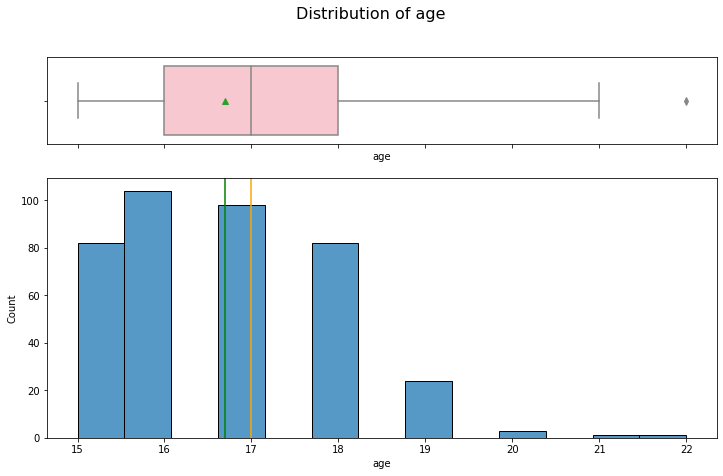

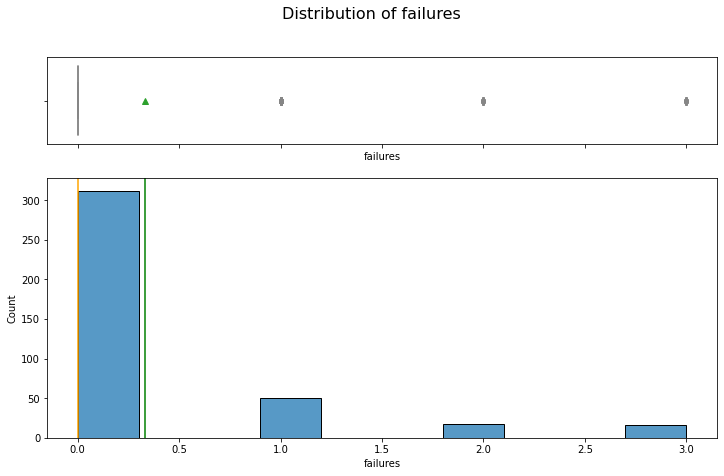

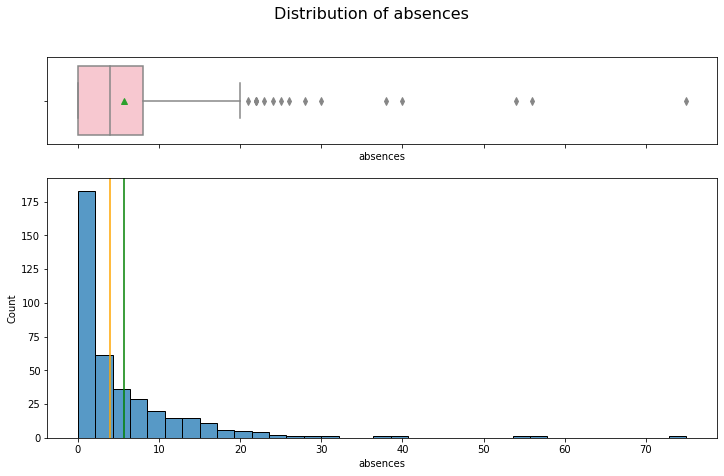

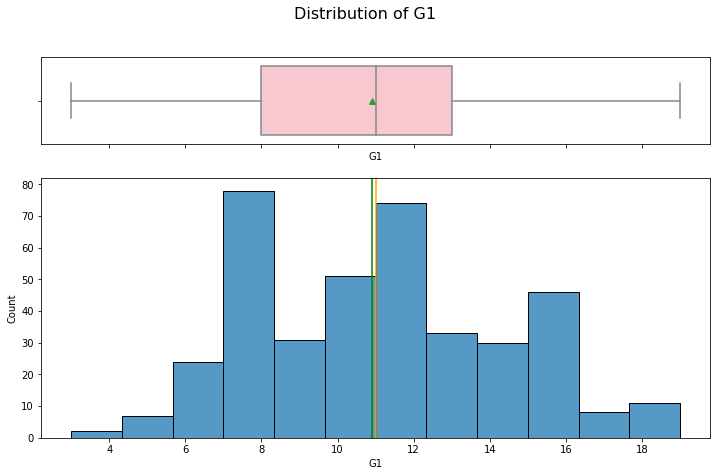

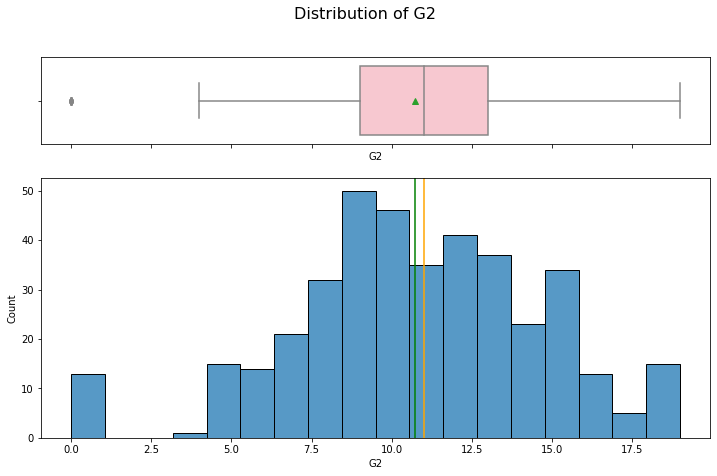

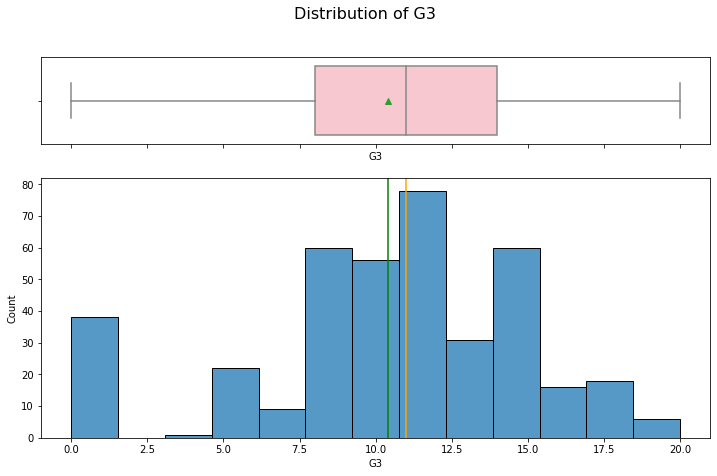

In [11]:
for i in cols_num:
    hist_box(data, i)

* Most features have a distribution close to normal
* Absences is right skewed. We can try a log transform.
* The target has a slightly left skewed distribution

### Categorical Features

In [12]:
def labeled_barplot(data, feature, perc = True, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 45, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )  # annotate the percentage
    
    plt.title(feature.capitalize())

    plt.show()  # show the plot

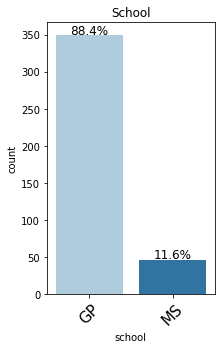

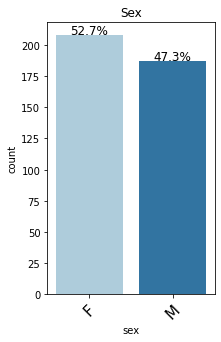

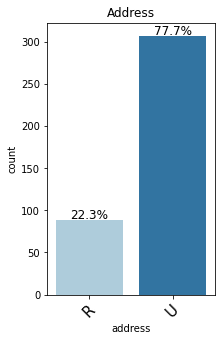

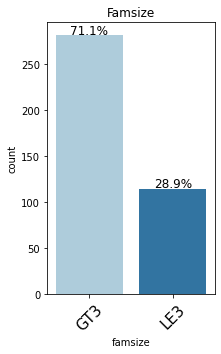

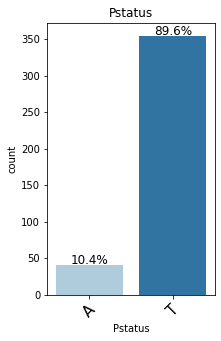

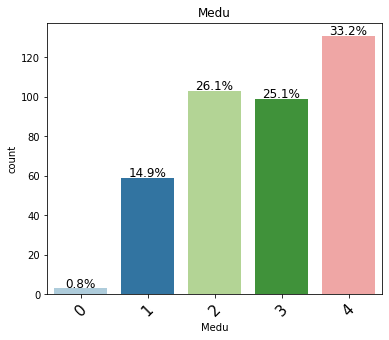

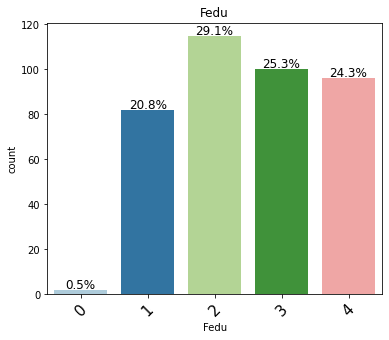

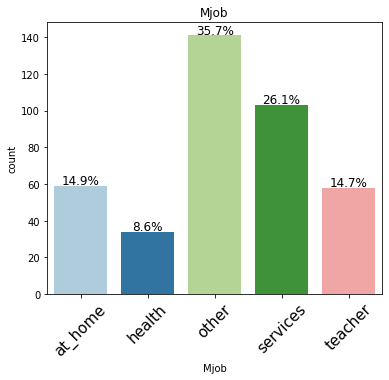

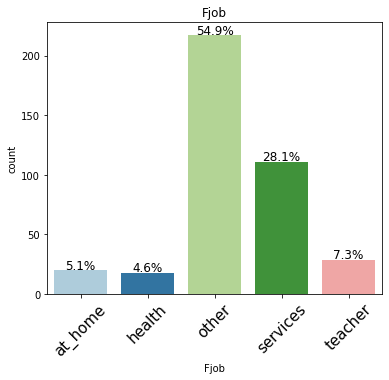

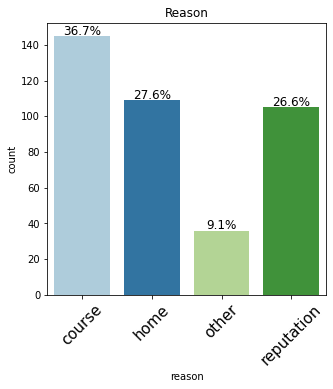

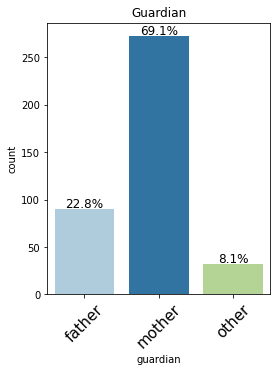

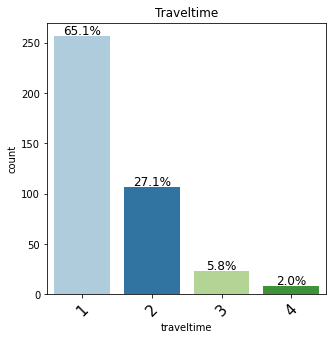

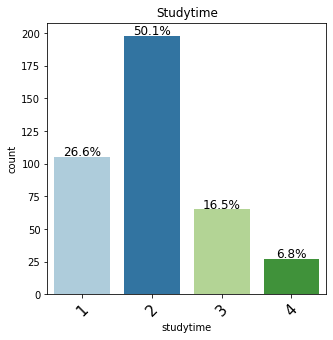

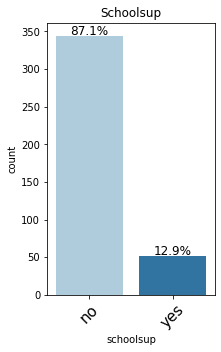

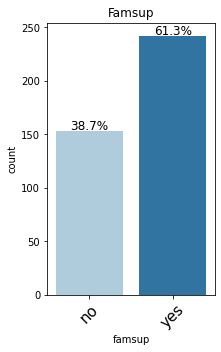

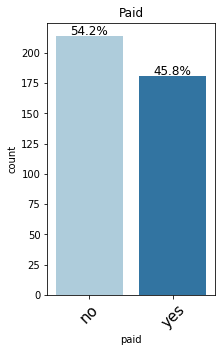

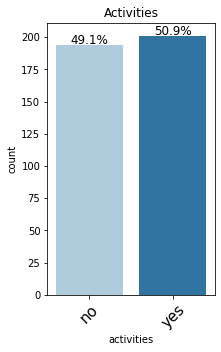

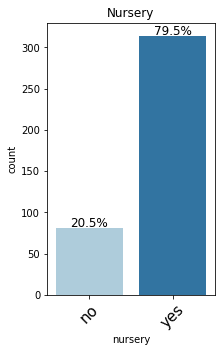

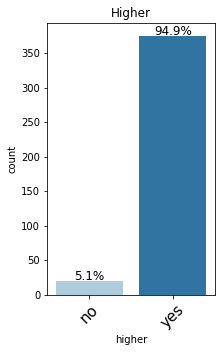

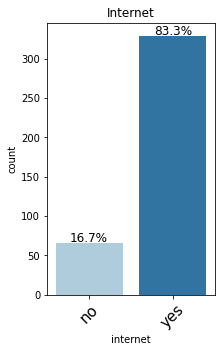

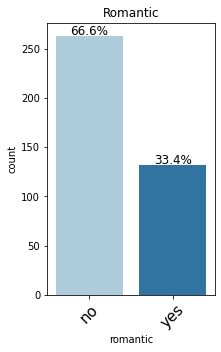

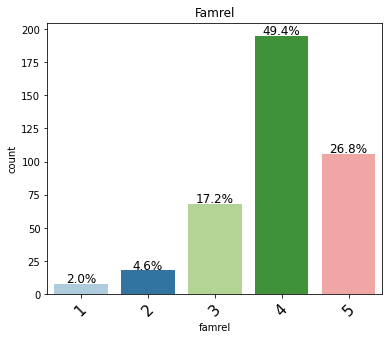

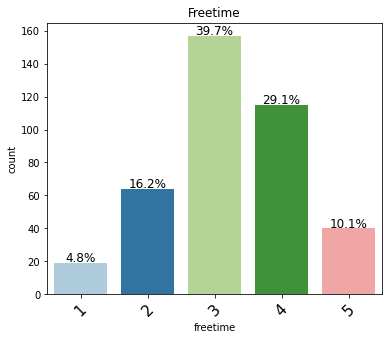

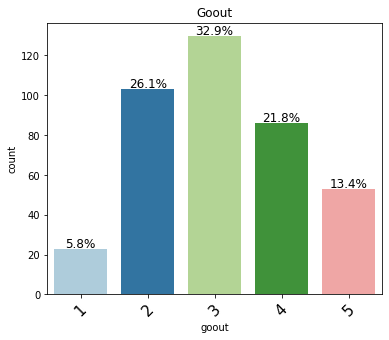

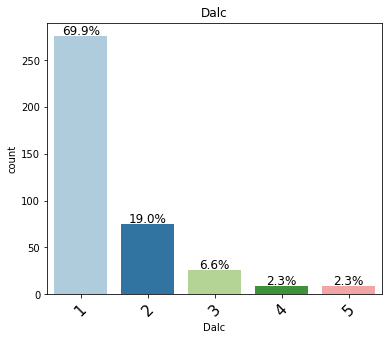

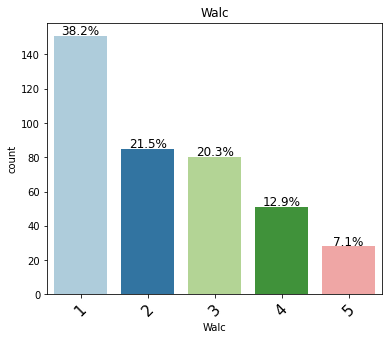

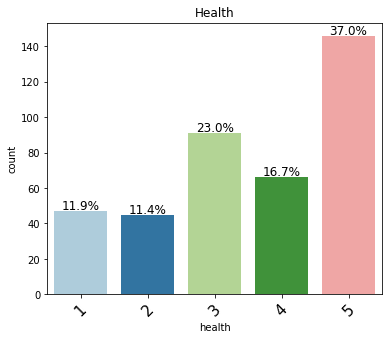

In [13]:
for i in cols_cat:
    labeled_barplot(data, i)

* 88.4% of students study at Gabriel Pereira schools
* There is a slightly higher number of females in the data
* 77.7% live in urban areas
* 71.1% have a family size of 3 or less
* 89.6% have their parents living together
* Mothers tend to have a higher education then the fathers
* Both mothers and fathers work in "other" areas, but there are more mothers that are housewives than fathers at home
* Most are studying at the schools due to the courses offered
* Mothers are 69.1% of the guardians of the students
* 65.1% of the students live 15 minutes or less from the school
* 87.1% of the students don't have extra educational support, while 61.3% have family support
* Extra-curricular activities are done by ~50% of the students, while ~54% takes paid classes
* Almost 80% of the students attended nursery school
* ~95 plan on studying at a university
* More than 83% of the students have internet at home
* 66.6% are not in a romantic relationship
* Almost 50% of the students have a very good (but not excellent) family relationship
* ~40% of the students have fairly free time after school
* Almost 70% go out with friends with some regularity
* ~70% don't drink alcohol during the week, which decreases to ~38% during weekdends
* There ~23% of the students in bad health conditions.

## Bivariate Analysis

### Cols vs Final Grades

#### Numerical

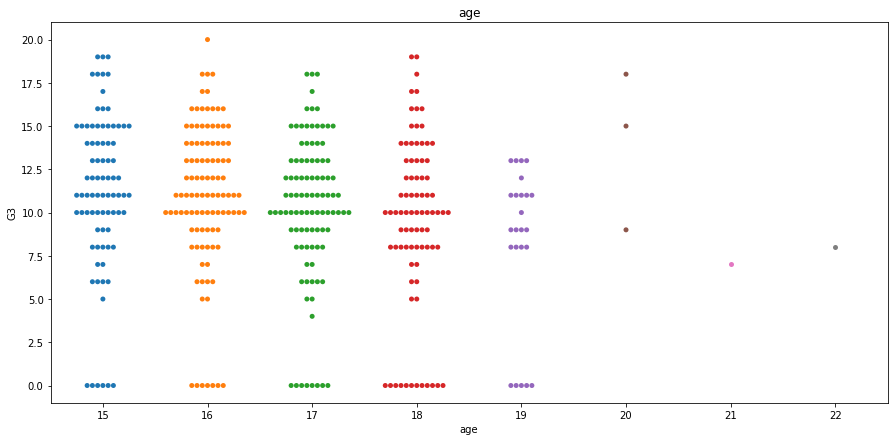

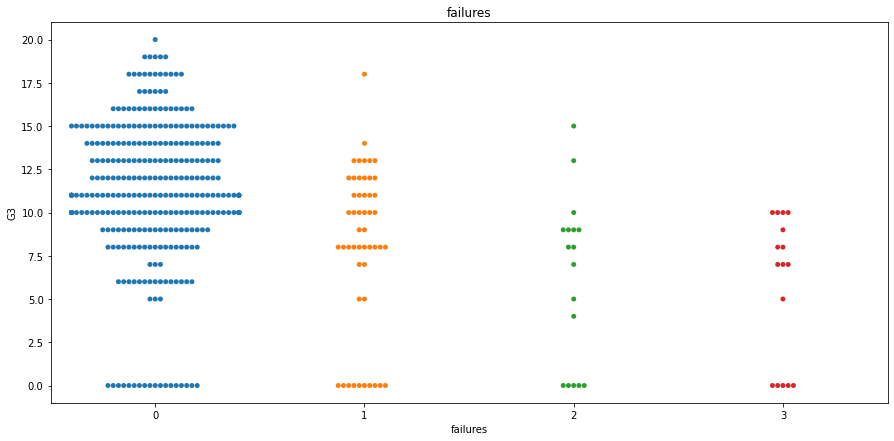

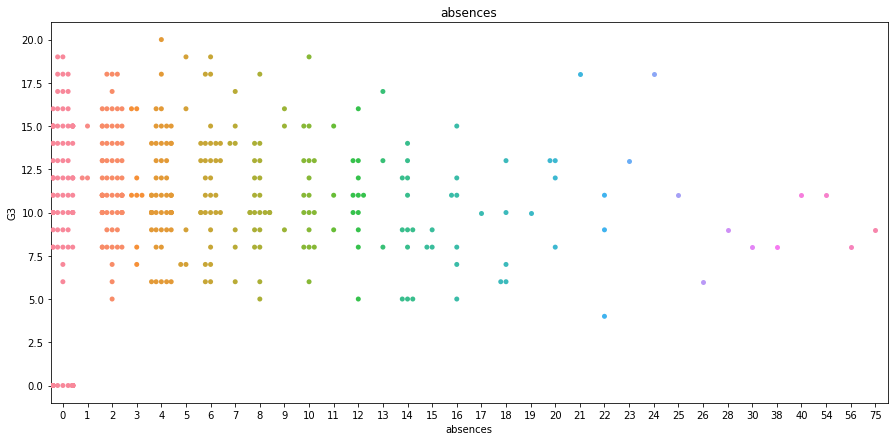

In [14]:
for i in ["age", "failures", "absences"]:
    plt.figure(figsize = (15, 7))
    sns.swarmplot(data = data, y = "G3", x = i)
    plt.title(i)
    plt.show()

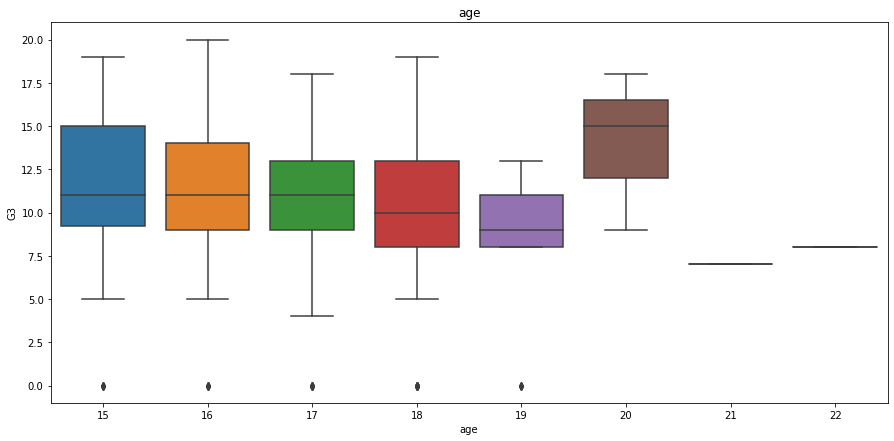

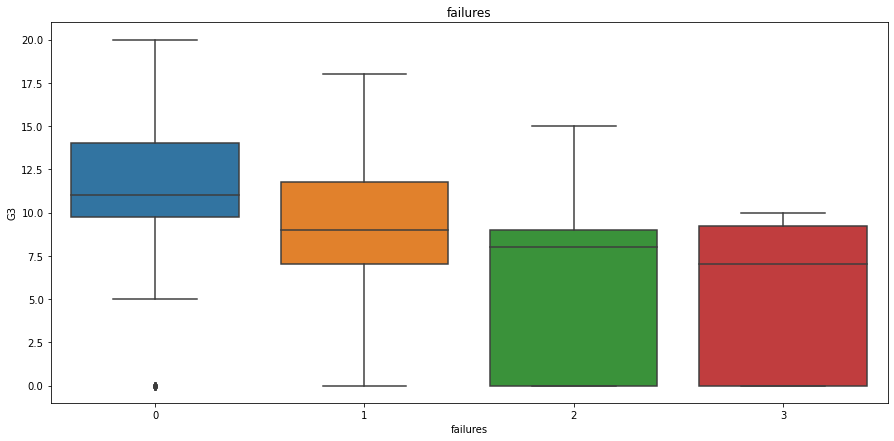

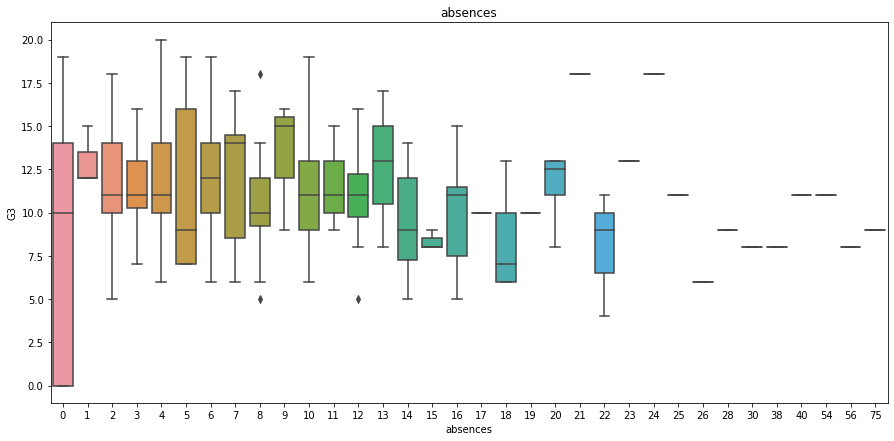

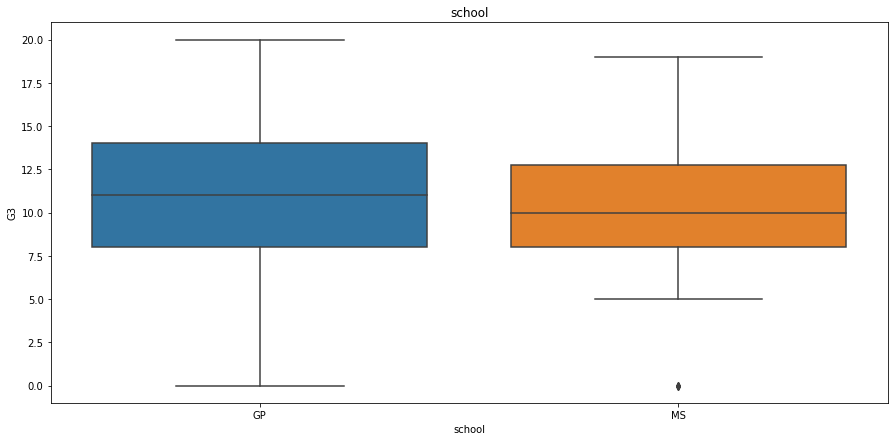

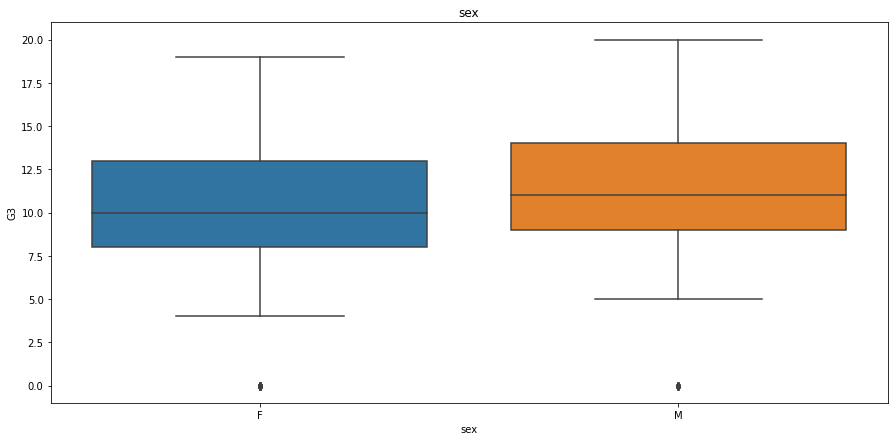

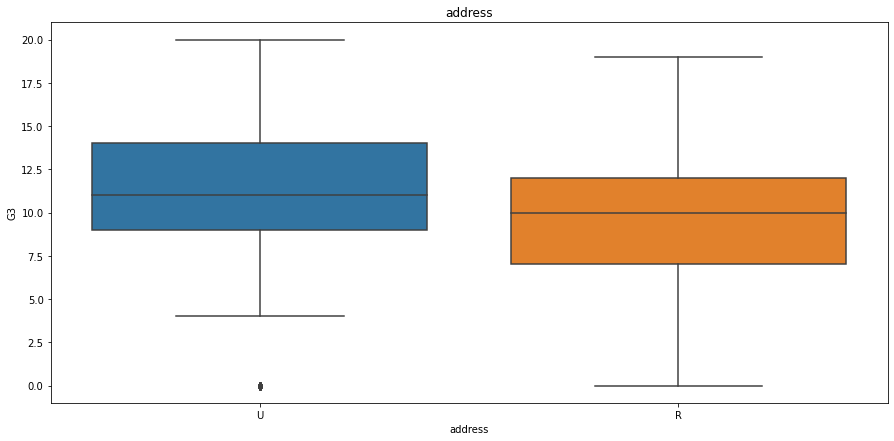

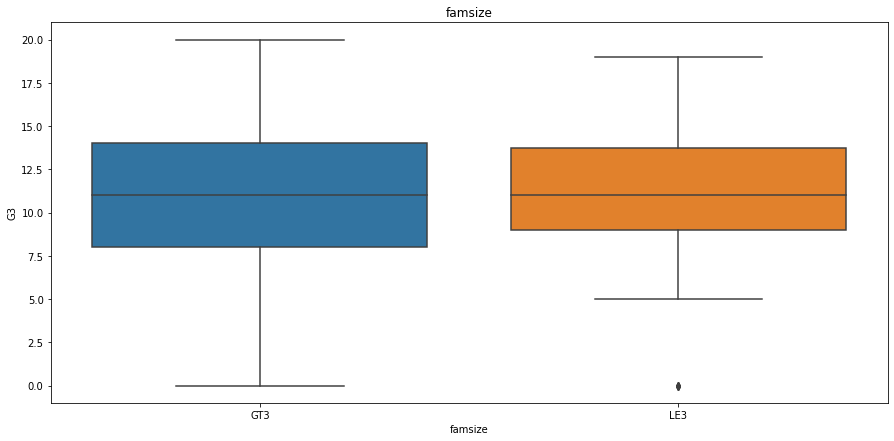

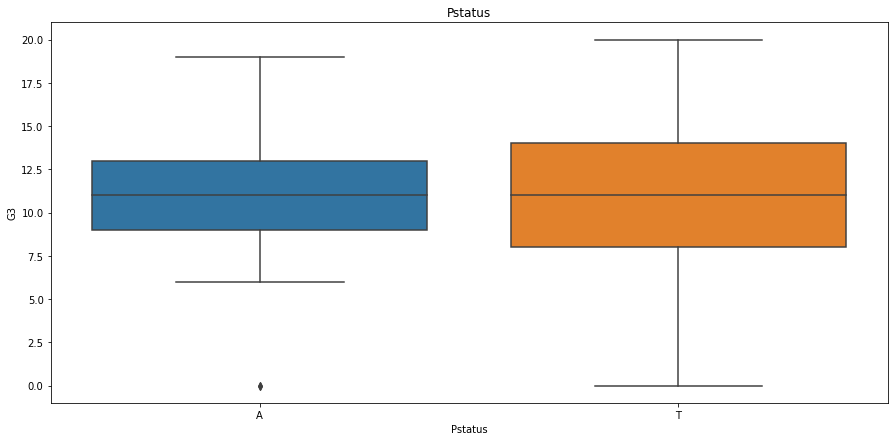

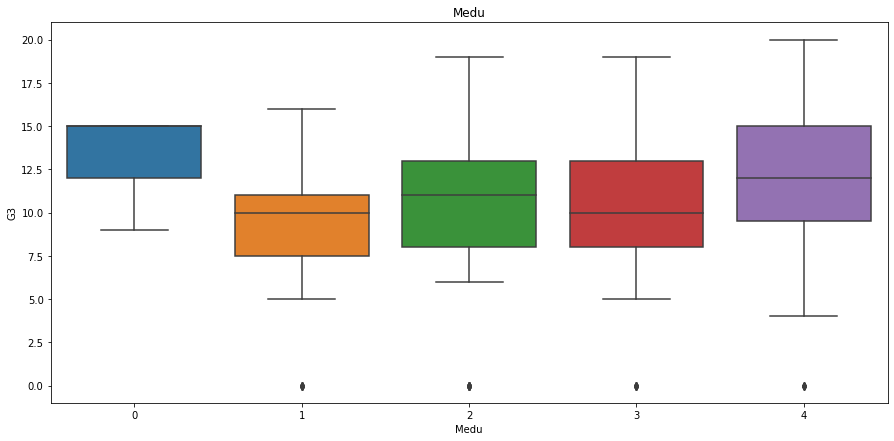

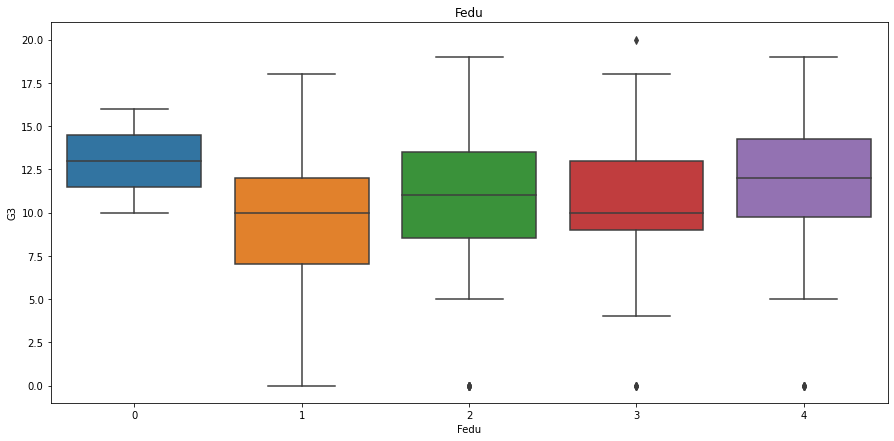

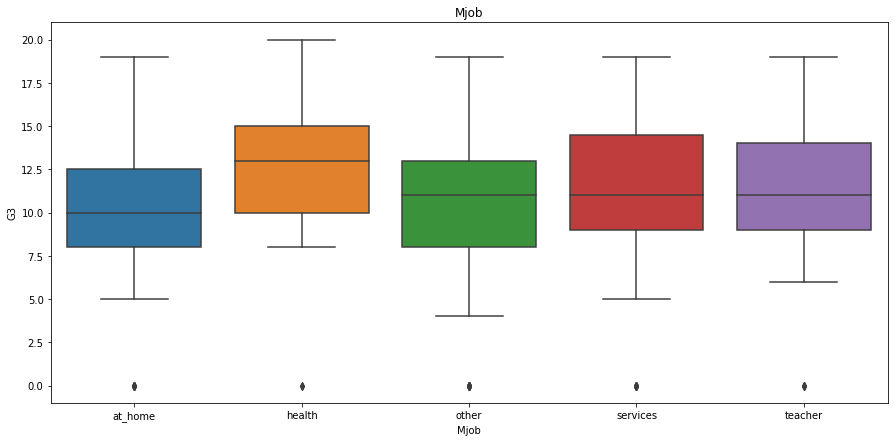

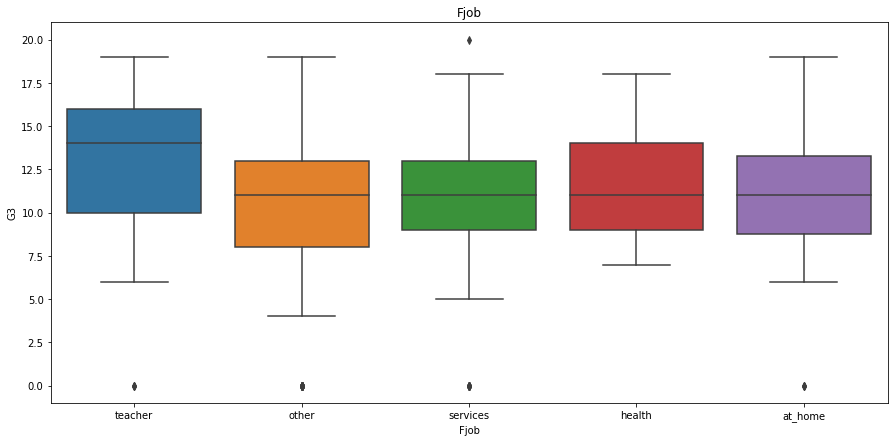

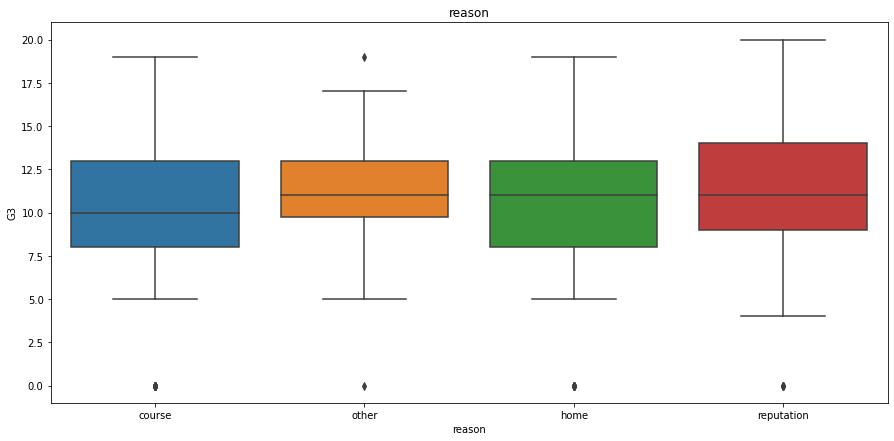

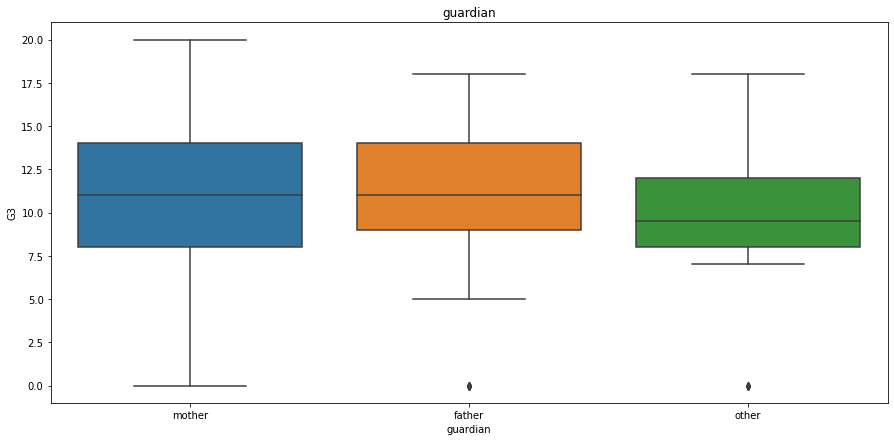

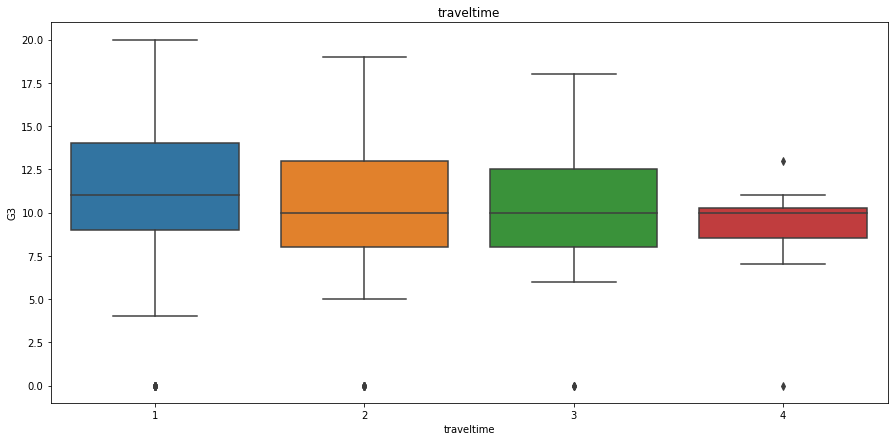

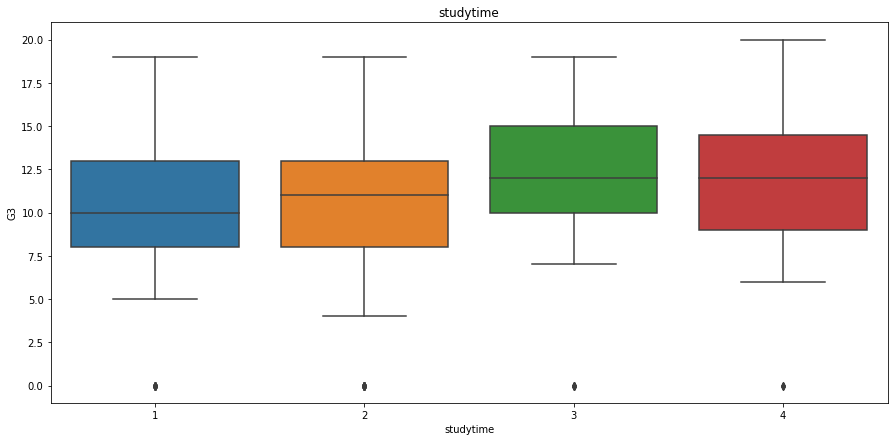

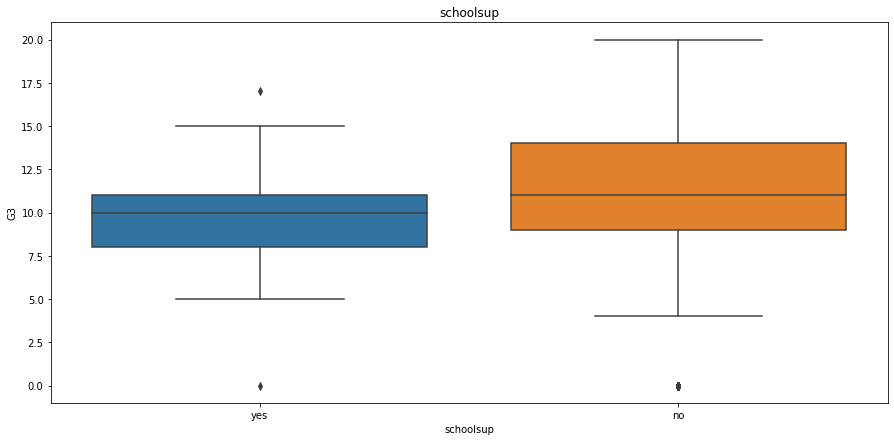

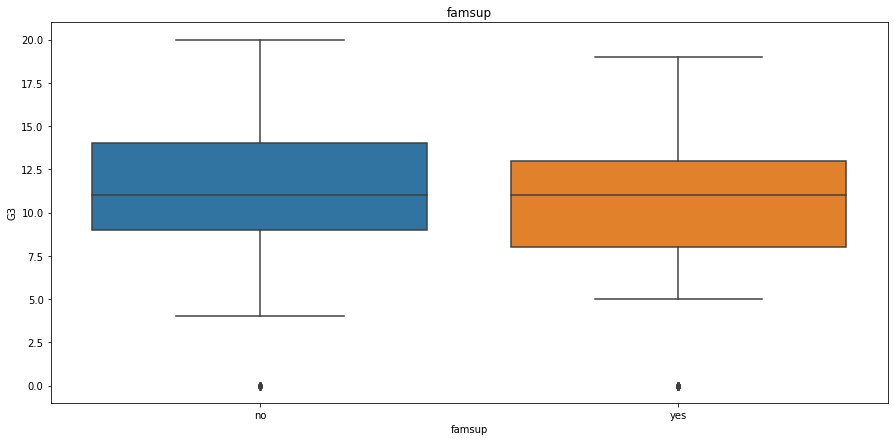

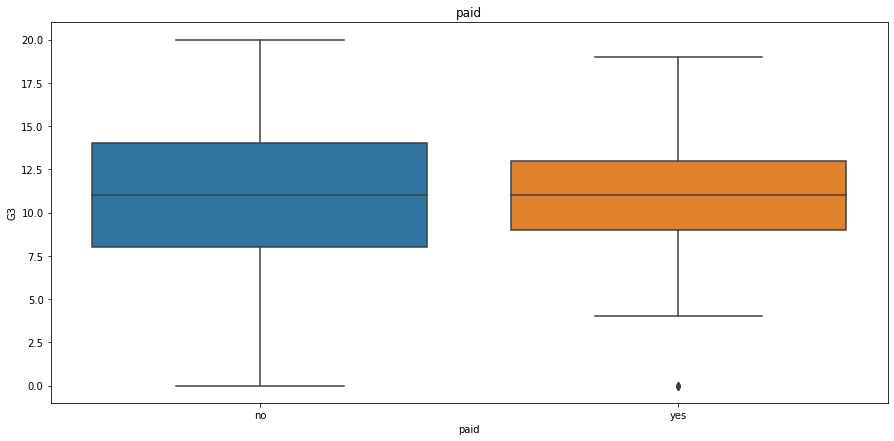

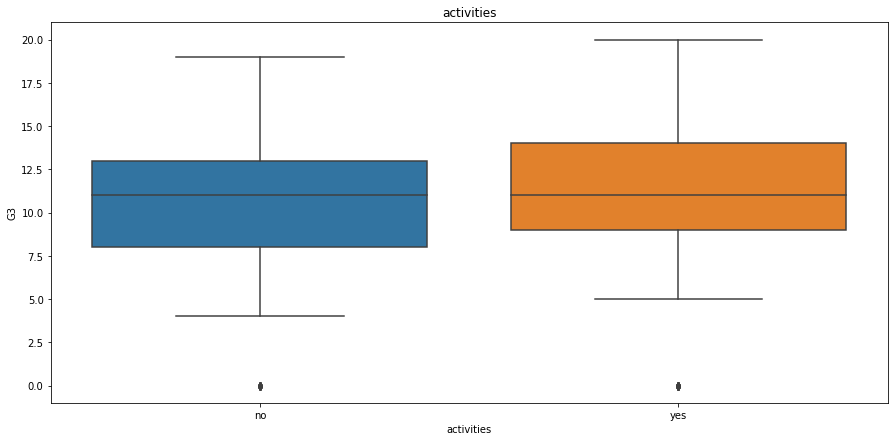

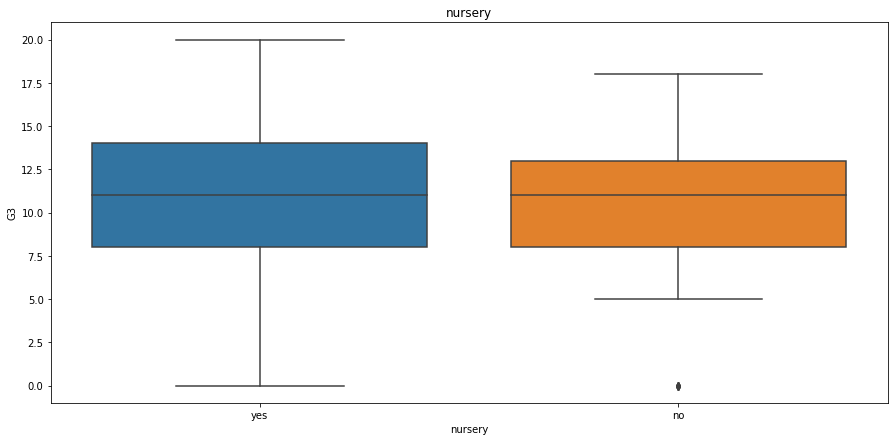

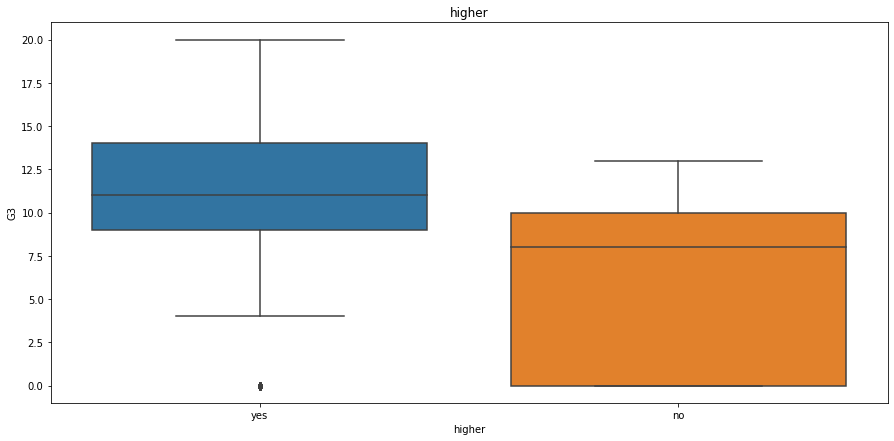

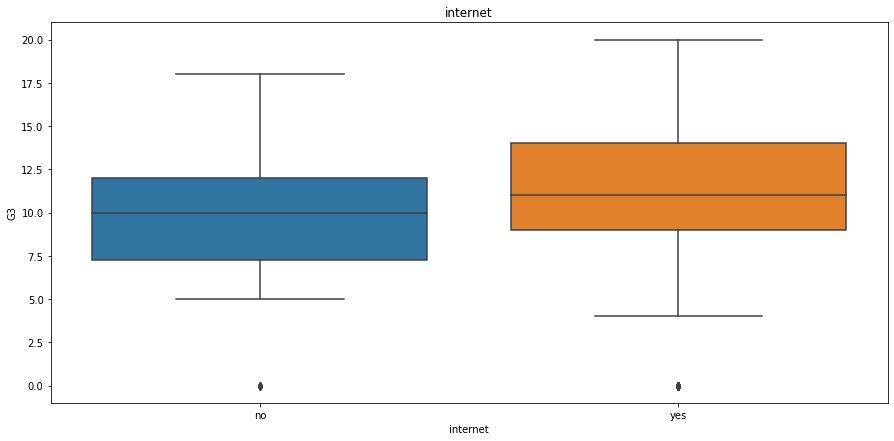

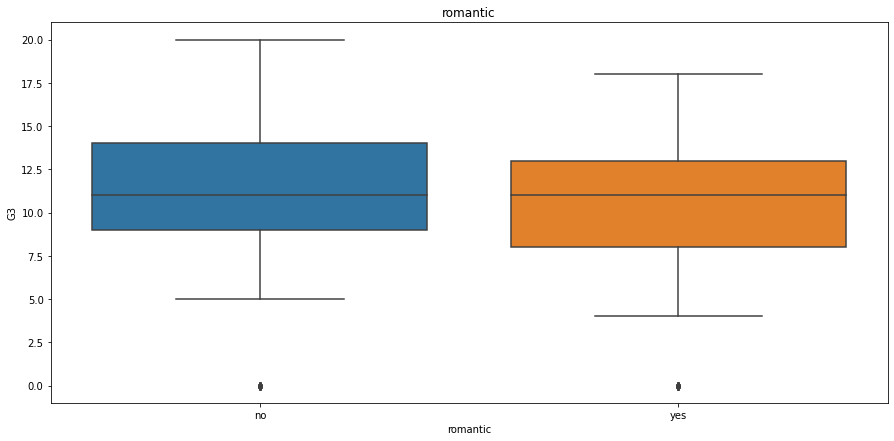

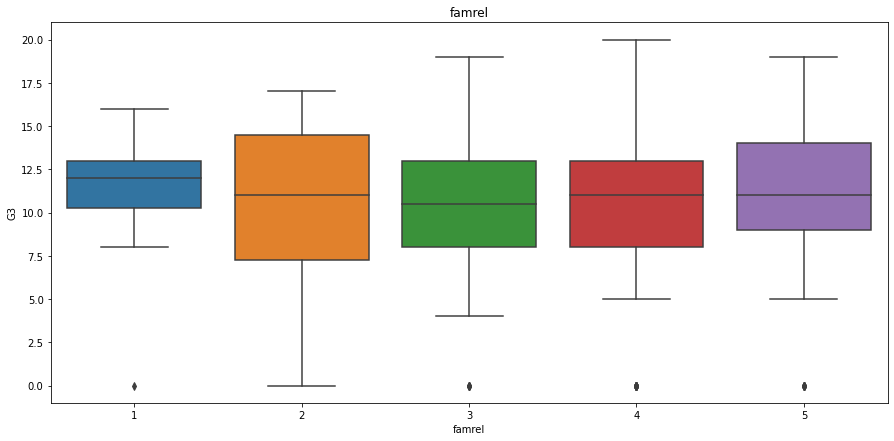

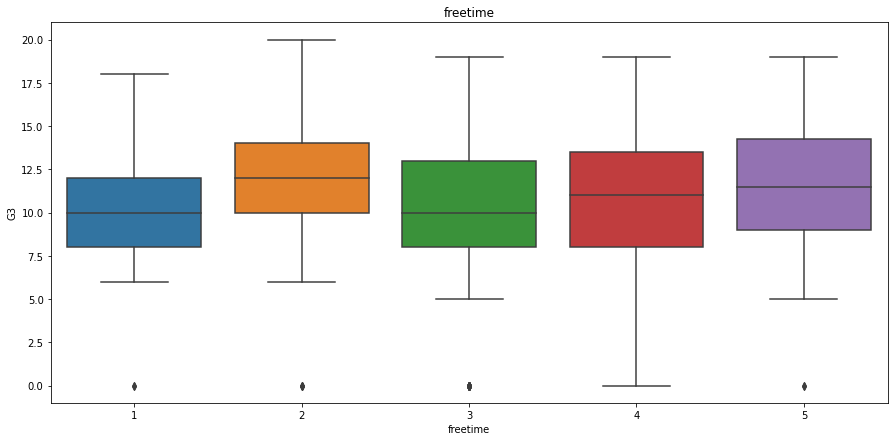

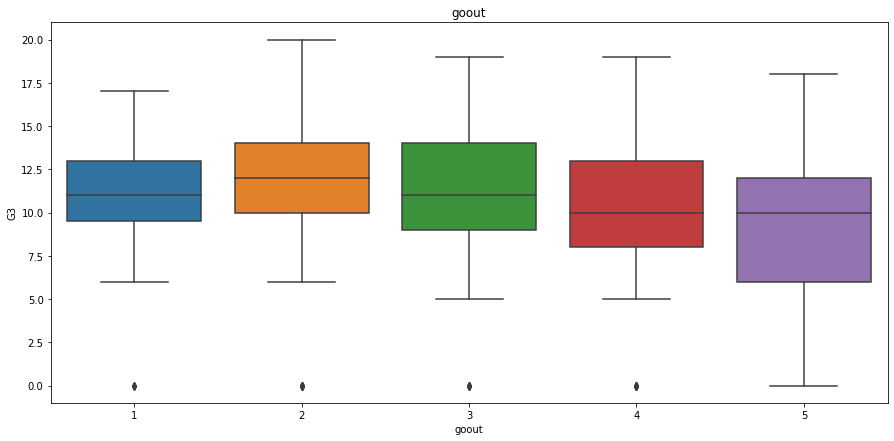

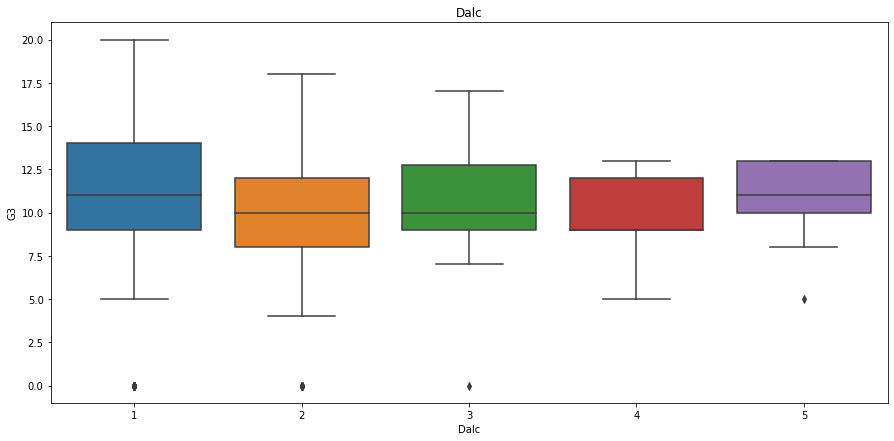

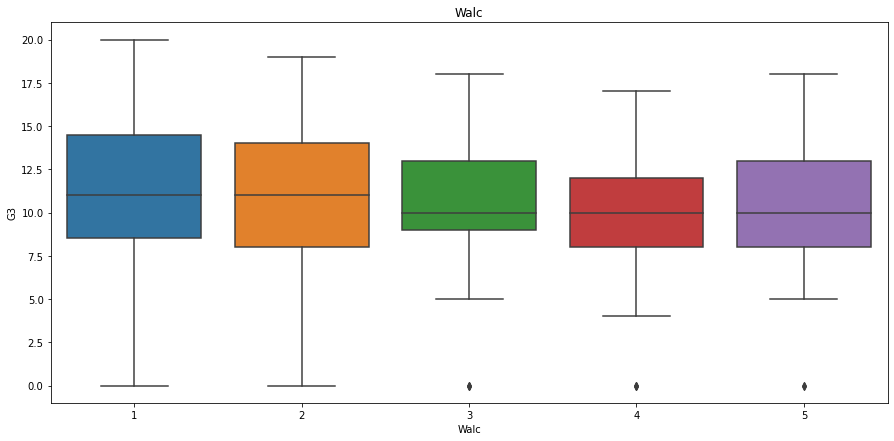

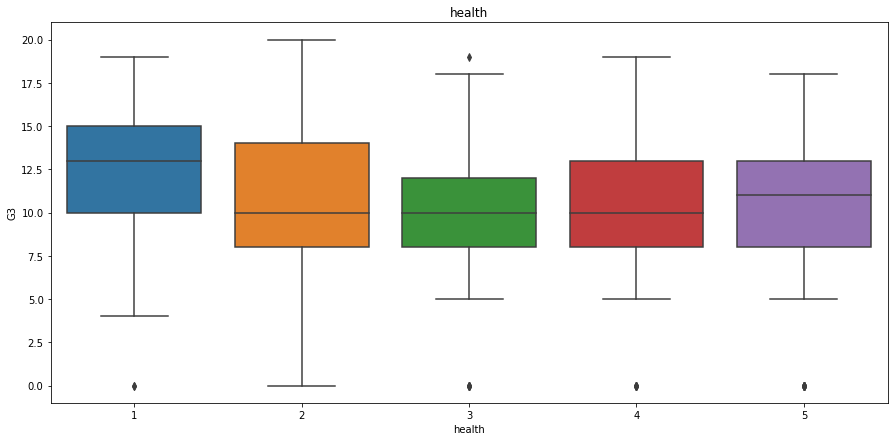

In [15]:
for i in ["age", "failures", "absences"] + cols_cat:
    plt.figure(figsize = (15, 7))
    sns.boxplot(data = data, y = "G3", x = i)
    plt.title(i)
    plt.show()

* Grades tend to decrease with ages from 15 to 19, and shows a high for students with 20 years old.
* Higher the number of failures is, lower the grades are.
* Students with no absence have a wide distribution of grades, while students with large number of absences tend to have lower grades.
* Students from Gabriel Pereira have higher math grades
* Students living in urban areas have higher grades
* Family size seems to not affect much
* Students that have their parents living together have a higher variation of grades
* Grades seem to be higher when the parents education is none
* The students have higher grades when the mother works in health jobs and when the father is a teacher
* When the reason for a student be in the school is reputation and other, the grades are slightly higher
* Grades are lower when the guardian of the student is none of their parents
* Students with higher studytime and lower travel time have higher grades
* This is counter intuitive, but students with lower educational support have higher grades
* Paid activities does not show much difference in grades, while students that take extra-curricular classes have higher grades
* There is a big difference in grades between the students that plan and not plan to study at a university, with the "yes" having higher grades
* Nursery school doesn't seem to influence in the grades
* Internet help students having higher grades
* Students in a romantic relationship tend to have lower grades
* Students with bad family relationship tend to have higher grades
* Higher free time tends to represent higher grades, except for the class "2"
* Students that go out more frequently with friends have lower grades
* Students that consume less alcohol have higher grades
* And students in bad health conditions are the ones that have the highest grades

## Multivariate

### Correlation Plot

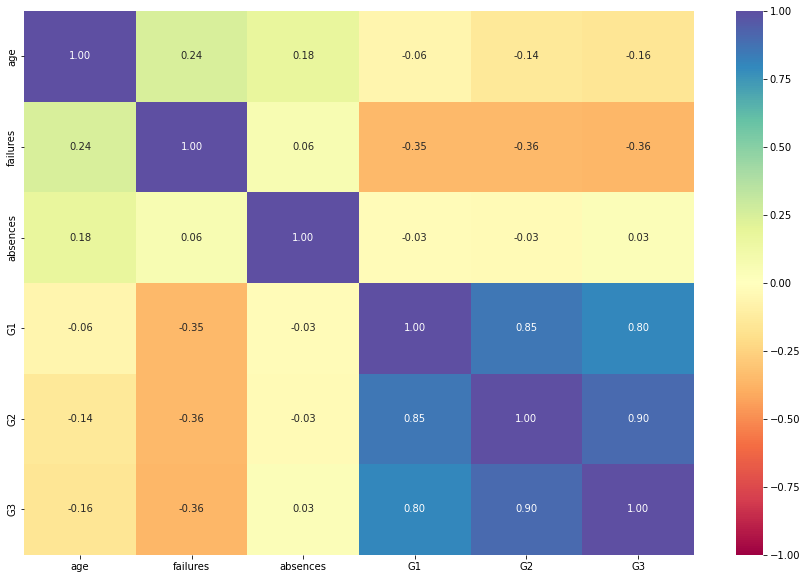

In [16]:
plt.figure(figsize = (15,10))
sns.heatmap(data = data.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", cmap = "Spectral");

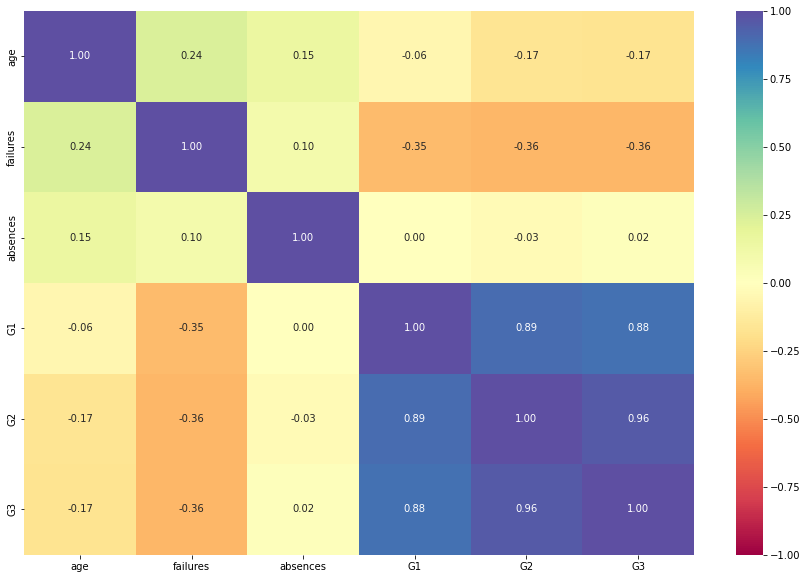

In [17]:
plt.figure(figsize = (15,10))
sns.heatmap(data = data.corr(method = "spearman"), vmin = -1, vmax = 1, annot = True, fmt = ".2f", cmap = "Spectral");

* Grades (G1, G2, and G3) have higher correlation with each other.

### Pair Plot

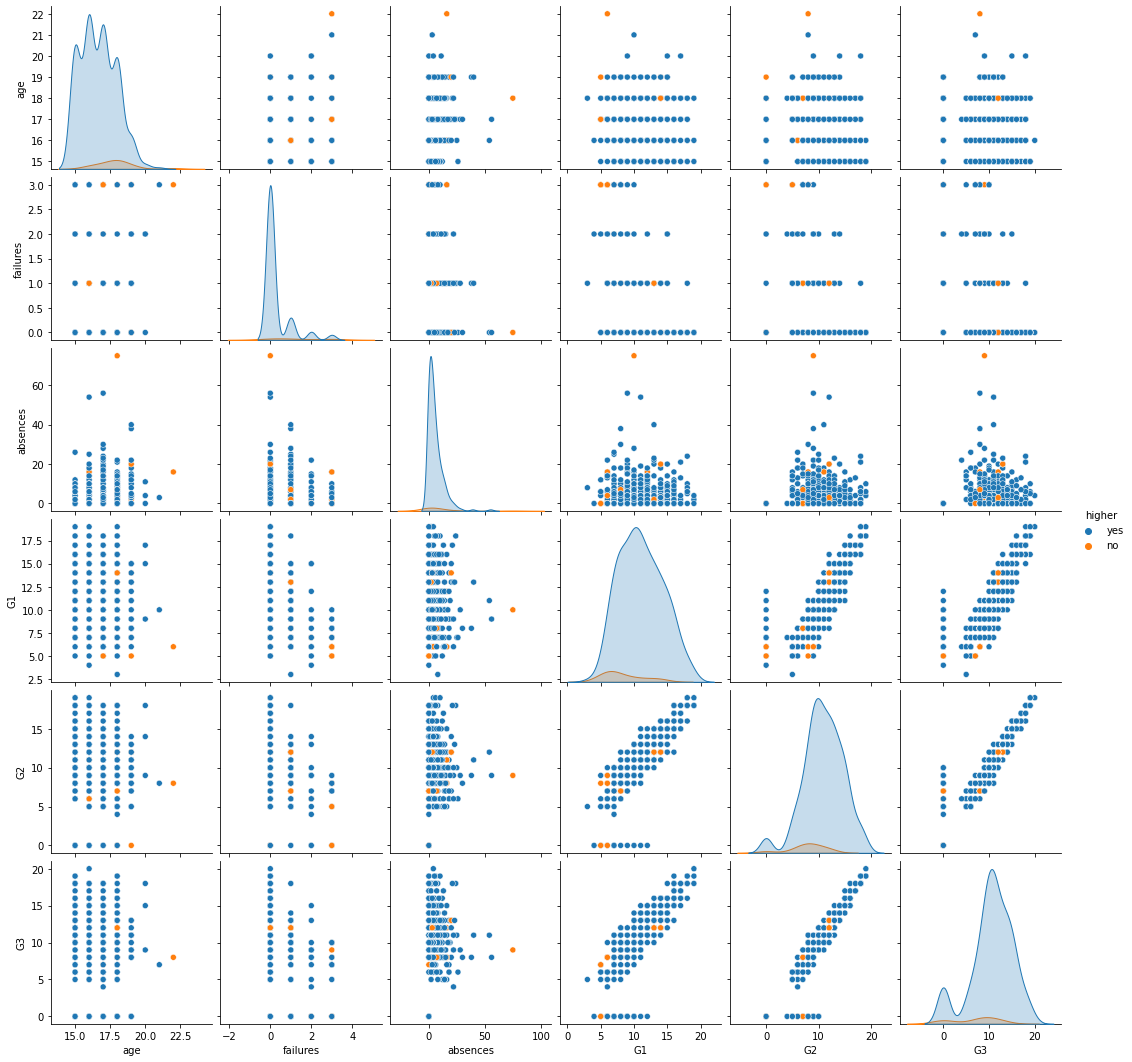

In [18]:
sns.pairplot(data = data, hue = "higher");

Similar interpretation as the correlation plot.

## Data Pre-Processing

### Log of absences

In [19]:
data["absences_log"] = np.log(data["absences"] + 1)

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,absences_log
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,1.95
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,1.61
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,2.40
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1.10
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,1.61


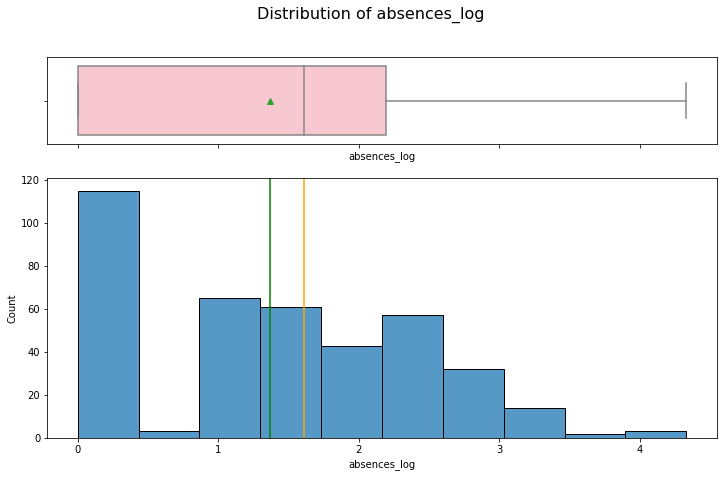

In [20]:
hist_box(data, "absences_log")

In [21]:
data.drop("absences", axis = 1, inplace = True)

In [22]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3,absences_log
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,5,6,6,1.95
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,5,5,6,1.61
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,7,8,10,2.40
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,15,14,15,1.10
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,6,10,10,1.61


### Mapping `object` features to numeric categorical

In [23]:
# Saving a copy of the data
data_bkp = data.copy()

In [24]:
# Columns of type object
cols_obj = list(data.select_dtypes("object"))
print(cols_obj)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


To map the string categories to numerical categories, we can convert then from object to categorical and then extract their numerical code.

In [25]:
pd.Categorical(data["Mjob"], categories = data["Mjob"].unique())

['at_home', 'at_home', 'at_home', 'health', 'other', ..., 'services', 'services', 'other', 'services', 'other']
Length: 395
Categories (5, object): ['at_home', 'health', 'other', 'services', 'teacher']

In [26]:
pd.Categorical(data["Mjob"], categories = data["Mjob"].unique()).codes

array([0, 0, 0, 1, 2, 3, 2, 2, 3, 2, 4, 3, 1, 4, 2, 1, 3, 2, 3, 1, 4, 1,
       4, 2, 3, 3, 2, 1, 3, 4, 1, 3, 4, 2, 2, 2, 4, 2, 3, 0, 2, 4, 3, 3,
       2, 2, 2, 1, 4, 3, 3, 1, 1, 3, 2, 2, 3, 4, 2, 3, 1, 3, 2, 4, 3, 4,
       2, 3, 1, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 0, 2, 2, 3, 3, 2, 3, 0, 2,
       3, 4, 2, 3, 2, 4, 3, 0, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 1,
       4, 3, 0, 4, 1, 4, 2, 2, 2, 2, 0, 3, 2, 1, 2, 3, 2, 0, 3, 4, 3, 0,
       2, 3, 0, 3, 0, 2, 3, 4, 4, 3, 4, 0, 2, 2, 1, 0, 4, 3, 2, 0, 3, 3,
       2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 3, 2, 1, 2, 1, 2, 2, 4, 0, 2, 4,
       3, 2, 4, 2, 4, 3, 3, 2, 2, 3, 3, 2, 1, 0, 3, 0, 0, 3, 2, 3, 3, 4,
       3, 4, 1, 2, 2, 2, 3, 0, 3, 4, 0, 4, 2, 3, 2, 3, 3, 2, 2, 3, 0, 0,
       0, 0, 3, 2, 4, 2, 2, 3, 0, 2, 1, 2, 4, 1, 2, 0, 2, 2, 0, 2, 1, 4,
       4, 3, 2, 2, 2, 3, 2, 2, 3, 0, 3, 2, 2, 1, 4, 3, 2, 3, 3, 4, 2, 2,
       0, 2, 3, 4, 1, 2, 2, 2, 2, 0, 0, 3, 2, 4, 1, 4, 3, 4, 0, 2, 2, 2,
       0, 3, 3, 4, 4, 1, 3, 3, 3, 1, 1, 2, 2, 4, 1,

Now let's convert all the object columns:

In [27]:
for col in cols_obj:
    data[col] = pd.Categorical(data[col], categories = data[col].unique()).codes
    data[col] = data[col].astype("category")

In [28]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3,absences_log
0,0,0,18,0,0,0,4,4,0,0,...,4,3,4,1,1,3,5,6,6,1.95
1,0,0,17,0,0,1,1,1,0,1,...,5,3,3,1,1,3,5,5,6,1.61
2,0,0,15,0,1,1,1,1,0,1,...,4,3,2,2,3,3,7,8,10,2.40
3,0,0,15,0,0,1,4,2,1,2,...,3,2,2,1,1,5,15,14,15,1.10
4,0,0,16,0,0,1,3,3,2,1,...,4,3,2,1,2,5,6,10,10,1.61


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   school        395 non-null    category
 1   sex           395 non-null    category
 2   age           395 non-null    int64   
 3   address       395 non-null    category
 4   famsize       395 non-null    category
 5   Pstatus       395 non-null    category
 6   Medu          395 non-null    category
 7   Fedu          395 non-null    category
 8   Mjob          395 non-null    category
 9   Fjob          395 non-null    category
 10  reason        395 non-null    category
 11  guardian      395 non-null    category
 12  traveltime    395 non-null    category
 13  studytime     395 non-null    category
 14  failures      395 non-null    int64   
 15  schoolsup     395 non-null    category
 16  famsup        395 non-null    category
 17  paid          395 non-null    category
 18  activities

# Regression

Meta-data:

In [30]:
features = list(data.drop(["G3"], axis = 1))
target = "G3"
print(features)

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'G1', 'G2', 'absences_log']


## Splitting the data into train and test

In [31]:
train, test = train_test_split(data, test_size = 0.2, random_state = 10)

print(train.shape[0], test.shape[0], data.shape[0])

316 79 395


In [32]:
train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3,absences_log
266,0,1,17,0,0,1,3,1,3,1,...,5,4,4,3,4,5,9,9,10,1.10
352,1,1,18,0,1,1,1,3,0,2,...,4,3,3,2,3,3,8,7,8,2.08
97,0,0,16,0,0,1,2,1,2,1,...,4,3,5,1,1,5,8,9,10,1.10
167,0,0,16,0,0,1,4,2,1,2,...,4,2,3,1,1,3,14,15,16,0.00
280,0,1,17,0,1,0,4,1,3,1,...,4,5,4,2,4,5,8,8,8,3.43


In [33]:
test.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3,absences_log
149,0,1,15,0,1,0,2,1,3,1,...,4,5,5,2,5,5,8,9,10,0.00
188,0,0,17,0,0,0,3,3,1,1,...,3,3,3,1,3,3,8,7,9,1.95
227,0,1,17,0,1,1,2,3,3,2,...,5,3,3,1,3,3,12,11,12,1.10
295,0,1,17,0,0,1,3,3,1,1,...,4,4,3,1,3,5,14,12,11,1.61
78,0,1,17,0,0,1,2,1,2,1,...,4,5,1,1,1,3,8,8,10,1.10


## Decision Tree

In [34]:
# Creating the model
model_dt = DecisionTreeRegressor(random_state = 1)

# Training the model on the train data
model_dt.fit(train[features], train[target])

DecisionTreeRegressor(random_state=1)

Plotting the Decision Tree:

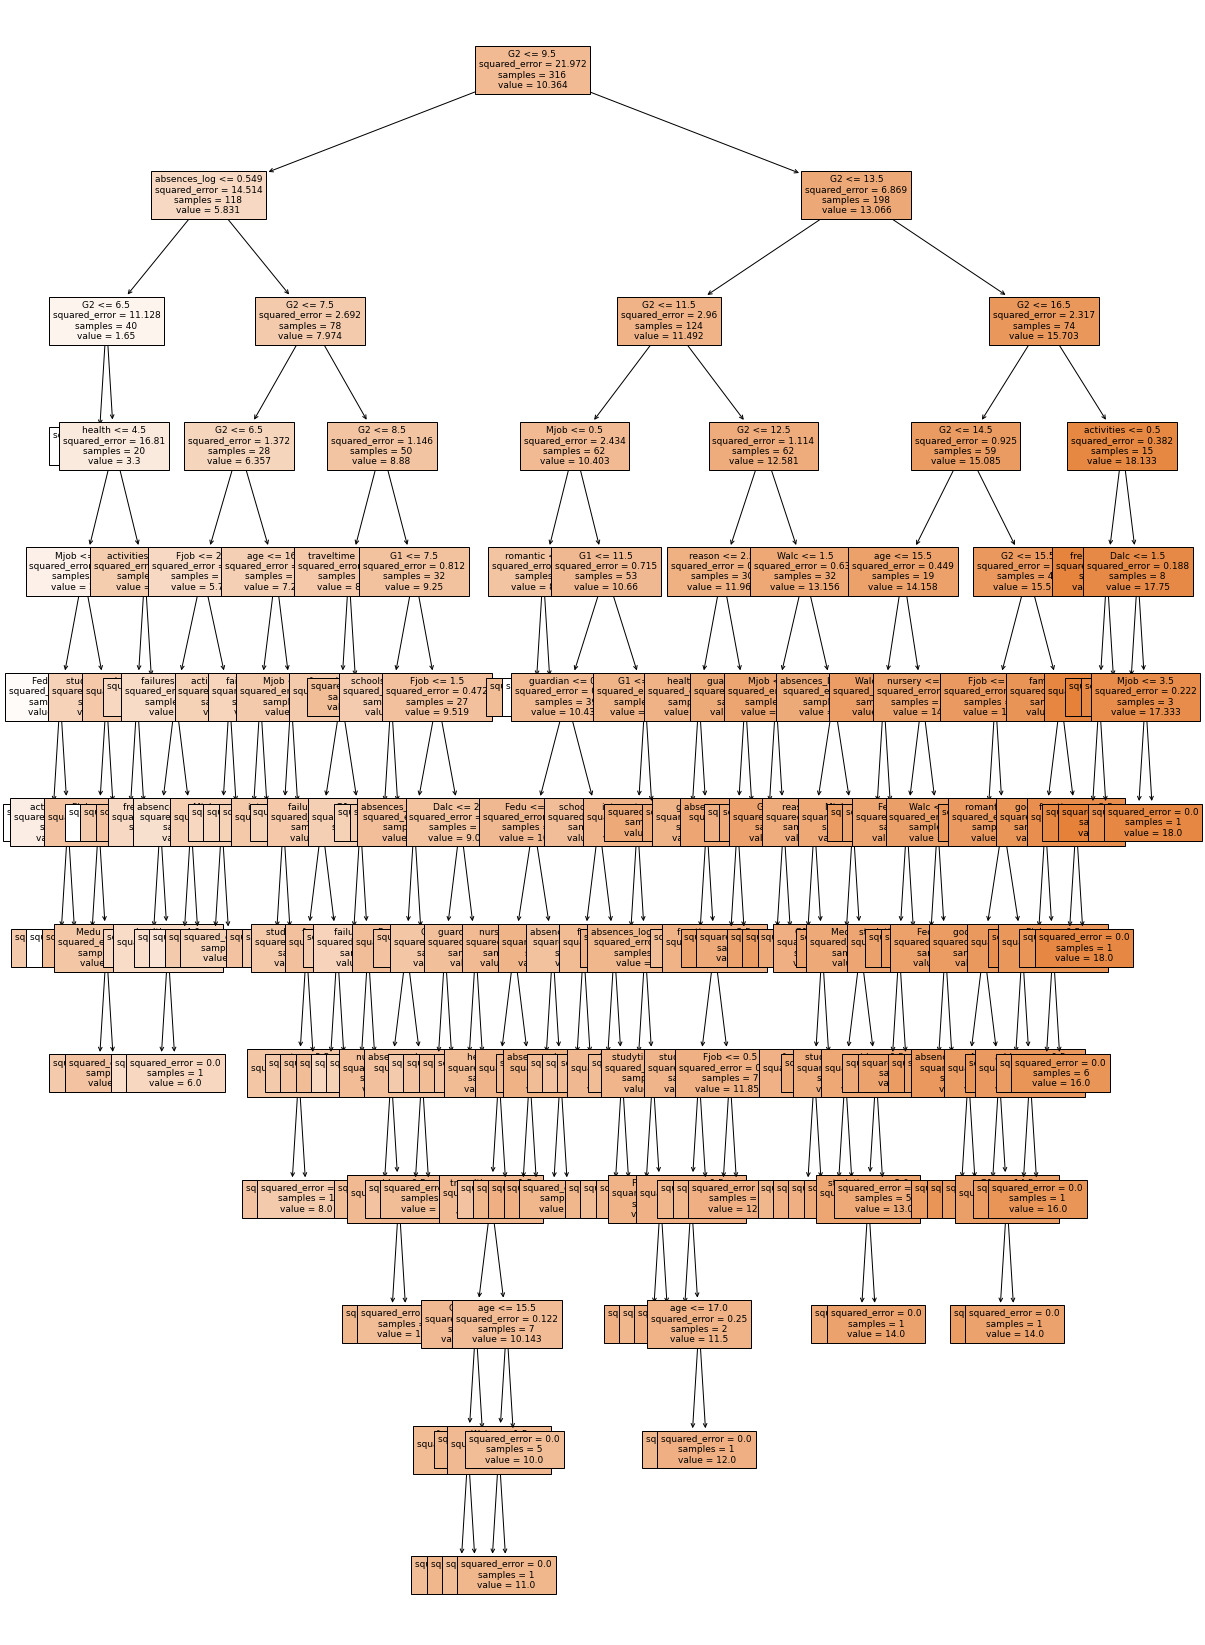

In [35]:
plt.figure(figsize=(20, 30))
plot_tree(
    model_dt,
    feature_names = features,
    filled = True,
    fontsize = 9,
    node_ids = False,
    class_names = None,
);

### Metrics DataFrame

In [36]:
def regression_metrics(model, data, features = features, target = target):

    # Computing prediction
    pred = model.predict(data[features])

    # Computing metrics
    r2 = r2_score(data[target], pred)
    mse = mean_squared_error(data[target], pred)
    evs = explained_variance_score(data[target], pred)

    # DataFrame
    df = pd.DataFrame([r2, mse, evs], index = ["R2 Score", "MSE", "Exp. Var."], columns = ["Values"])
    
    return df
    

In [37]:
print("Train Data")
regression_metrics(model_dt, train)

Train Data


,Values
R2 Score,1.00
MSE,0.00
Exp. Var.,1.00


In [38]:
print("Test Data")
regression_metrics(model_dt, test)

Test Data


,Values
R2 Score,0.51
MSE,8.18
Exp. Var.,0.52


Predictions look okay, but they could be better.

In [40]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 22.9 MB/s 
     |████████████████████████████████| 950 kB 37.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Text(0.5, 1.0, 'Decision Tree')

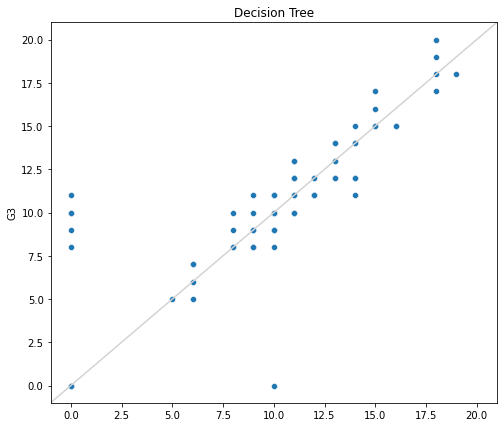

In [39]:
plt.figure(figsize = (8,7))
plt.axline((0,0), (20, 20), color = "lightgray")
sns.scatterplot(model_dt.predict(test[features]), test[target])
plt.title("Decision Tree")

Let's prune the the tree to see if we can get better predictions. For that, we need to tune the `max_depth` parameter.

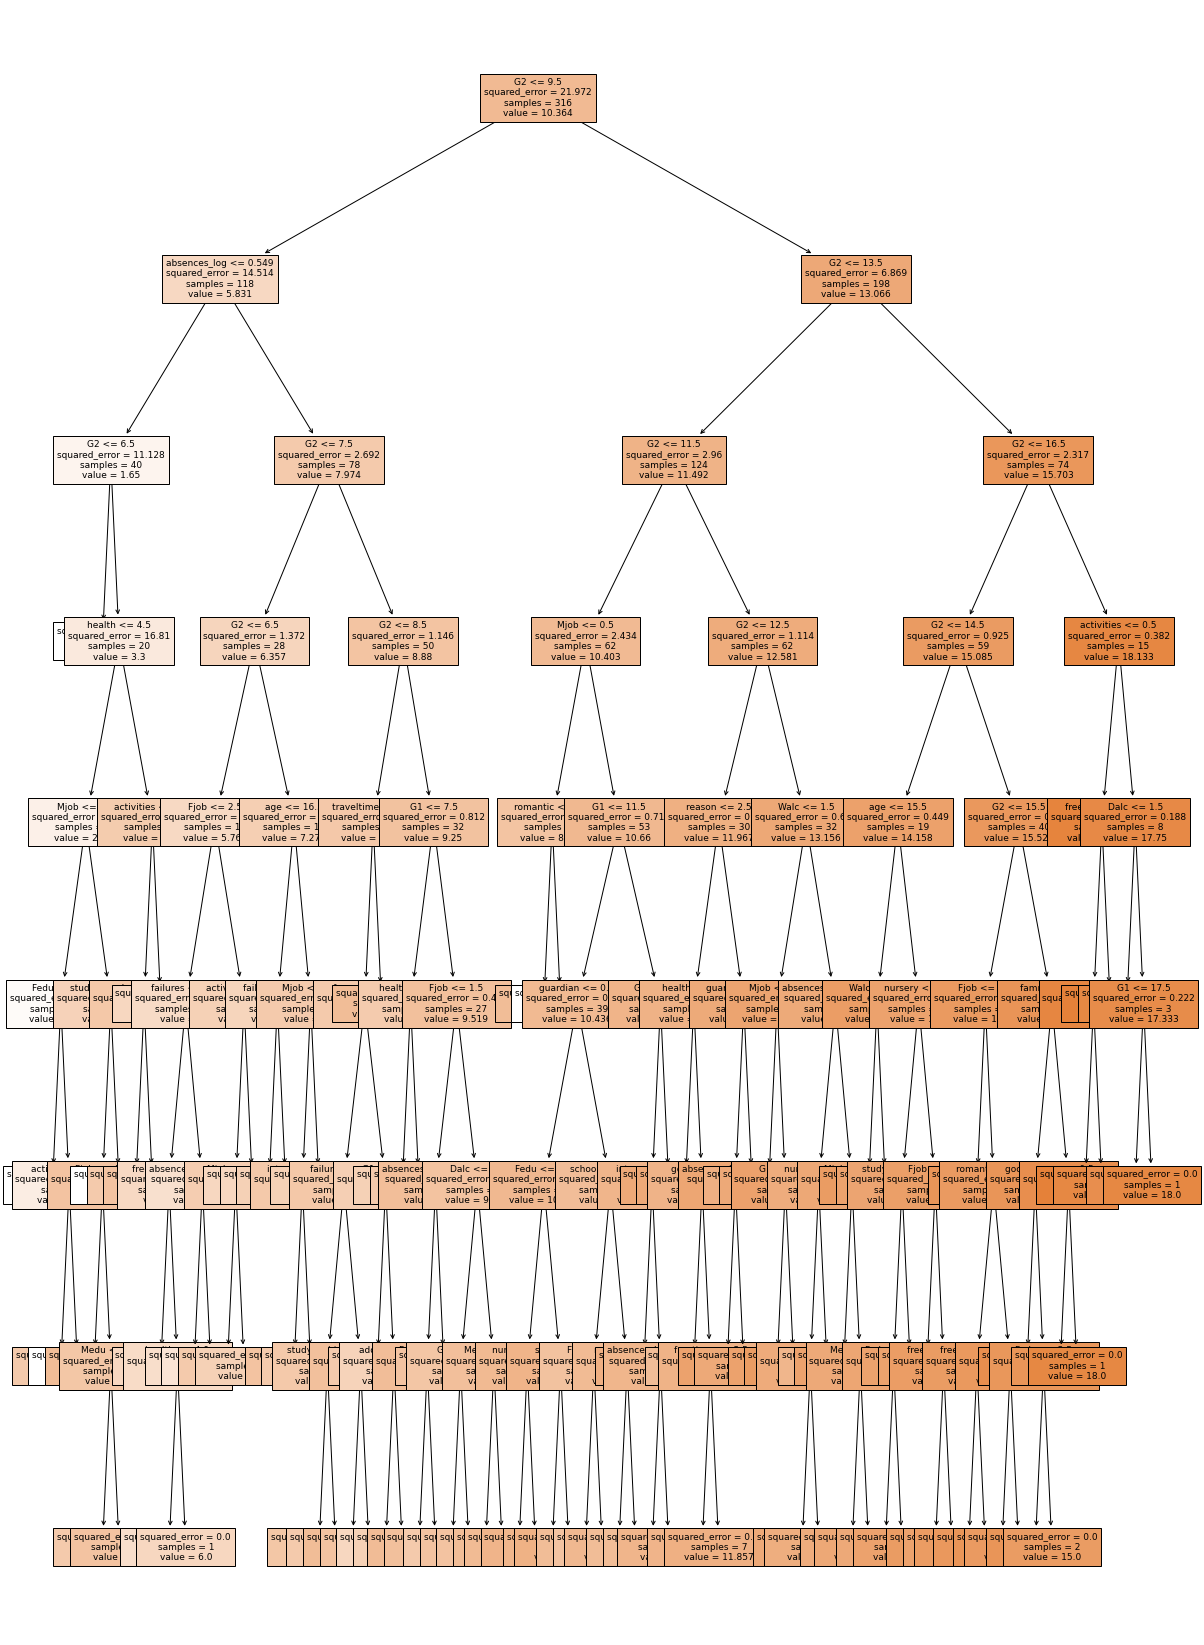

In [40]:
# Creating the model
model_dt = DecisionTreeRegressor(max_depth = 8, random_state = 1)

# Training the model on the train data
model_dt.fit(train[features], train[target])

# Plot tree
plt.figure(figsize=(20, 30))
plot_tree(
    model_dt,
    feature_names = features,
    filled = True,
    fontsize = 9,
    node_ids = False,
    class_names = None,
);

In [41]:
print("Train Data")
regression_metrics(model_dt, train)

Train Data


,Values
R2 Score,1.00
MSE,0.06
Exp. Var.,1.00


In [42]:
print("Test Data")
regression_metrics(model_dt, test)

Test Data


,Values
R2 Score,0.52
MSE,8.10
Exp. Var.,0.53


Text(0.5, 1.0, 'Decision Tree')

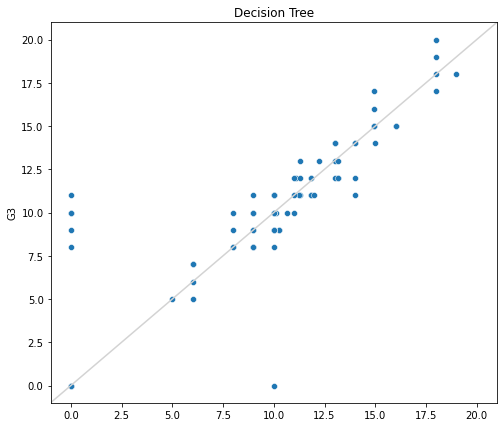

In [43]:
plt.figure(figsize = (8,7))
plt.axline((0,0), (20, 20), color = "lightgray")
sns.scatterplot(model_dt.predict(test[features]), test[target])
plt.title("Decision Tree")

Pruning the tree slightly improved the predictions.

## Random Forest

Train Data
           Values
R2 Score     0.94
MSE          1.22
Exp. Var.    0.94
--------------------
Test Data
           Values
R2 Score     0.71
MSE          4.91
Exp. Var.    0.71
--------------------


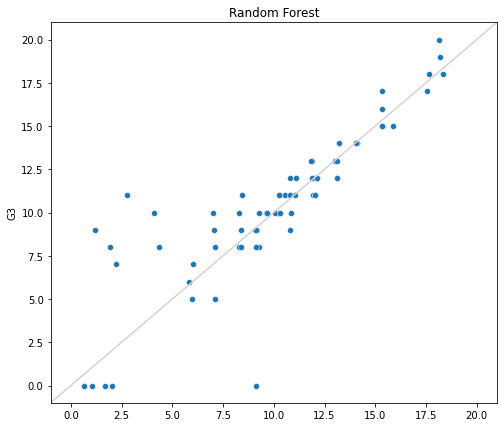

In [44]:
# Training model
model_rf = RandomForestRegressor(
    n_estimators = 1000, 
    max_depth = 4, 
    random_state = 1, 
    n_jobs = -1
).fit(train[features], train[target])

# Metrics
print("Train Data")
print(regression_metrics(model_rf, train))
print(20 * "-")

print("Test Data")
print(regression_metrics(model_rf, test))
print(20 * "-")

# Plotting predictions vs true
plt.figure(figsize = (8,7))
plt.axline((0,0), (20, 20), color = "lightgray")
sns.scatterplot(model_rf.predict(test[features]), test[target])
plt.title("Random Forest");

The random forest is doing better than the decision tree, but is overfitting on the training set.

## Gradient Boosting

### Scikit-Learn

Train Data
           Values
R2 Score     0.97
MSE          0.61
Exp. Var.    0.97
--------------------
Test Data
           Values
R2 Score     0.78
MSE          3.75
Exp. Var.    0.78
--------------------


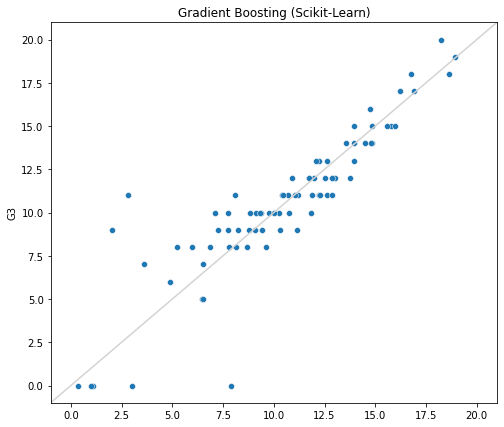

In [45]:
# Training model
model_gb = GradientBoostingRegressor(
    n_estimators = 500, 
    max_depth = 2, 
    random_state = 1,
    max_features = "auto"
).fit(train[features], train[target])

# Metrics
print("Train Data")
print(regression_metrics(model_gb, train))
print(20 * "-")

print("Test Data")
print(regression_metrics(model_gb, test))
print(20 * "-")

# Plotting predictions vs true
plt.figure(figsize = (8,7))
plt.axline((0,0), (20, 20), color = "lightgray")
sns.scatterplot(model_gb.predict(test[features]), test[target])
plt.title("Gradient Boosting (Scikit-Learn)");

The sklearn's gradient boosting is performing better than the random forest, and is also overfitting on the training data.

### XGBoost

We need to convert the categorical columns to numeric for the XGBRegressor:

In [46]:
data_xgb = data.copy()

for col in features:
    data_xgb[col] = data_xgb[col].astype("float")

train_xgb, test_xgb = train_test_split(data_xgb, test_size = 0.2, random_state = 10)

Now training the model:

[17:08:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train Data
           Values
R2 Score     0.94
MSE          1.31
Exp. Var.    0.94
--------------------
Test Data
           Values
R2 Score     0.77
MSE          3.82
Exp. Var.    0.77
--------------------


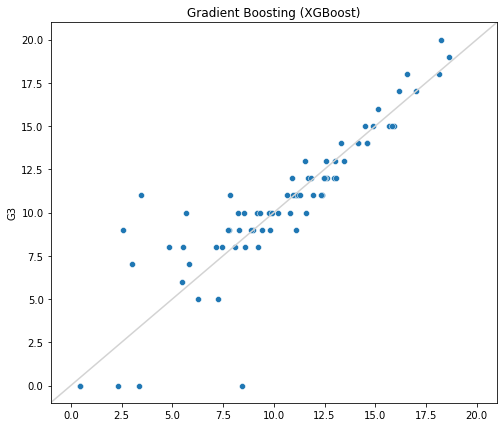

In [47]:
# Training model
model_xgb = XGBRegressor(
    n_estimators = 100, 
    max_depth = 2,
    # reg_alpha = 10,
    # reg_lambda = 50,
    tree_method = "exact",
    random_state = 1
).fit(train_xgb[features], train_xgb[target])

# Metrics
print("Train Data")
print(regression_metrics(model_xgb, train_xgb))
print(20 * "-")

print("Test Data")
print(regression_metrics(model_xgb, test_xgb))
print(20 * "-")

# Plotting predictions vs true
plt.figure(figsize = (8,7))
plt.axline((0,0), (20, 20), color = "lightgray")
sns.scatterplot(model_xgb.predict(test_xgb[features]), test_xgb[target])
plt.title("Gradient Boosting (XGBoost)")
plt.show()

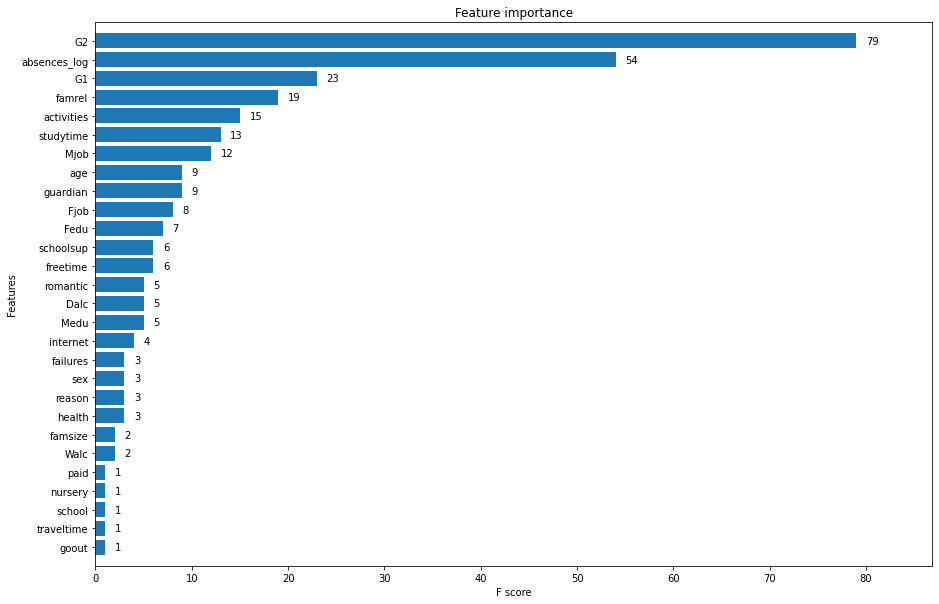

In [48]:
fig, ax = plt.subplots(1,1,figsize = (15,10))
plot_importance(model_xgb, height = 0.8, ax = ax, grid = False);

The XGBRegressor is performing similarly to the Scikit-Learn implementation, and is also overfitting. From the feature importance, *absences_log* is shown to be the most important parameter (but it changes if we set different parameters).

Try changing the regularization parameters `reg_alpha` (L1) or `reg_lambda` (L2) and check if the results can be improved.

## Lasso Regression

Let's try and see if others models perform better. For that, we need to use the one-hot-encoding and take the z-score of the features.

In [49]:
data2 = data.copy()

# One-hot encoding
data2 = pd.get_dummies(data2, drop_first = True)
data2.head()

,age,failures,G1,G2,G3,absences_log,school_1,sex_1,address_1,famsize_1,...,Dalc_4,Dalc_5,Walc_2,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5
0,18,0,5,6,6,1.95,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,17,0,5,5,6,1.61,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,15,3,7,8,10,2.40,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,15,0,15,14,15,1.10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,16,0,6,10,10,1.61,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [50]:
features = list(data2.drop(["G3"], axis = 1))
target = "G3"
print(features)

['age', 'failures', 'G1', 'G2', 'absences_log', 'school_1', 'sex_1', 'address_1', 'famsize_1', 'Pstatus_1', 'Medu_1', 'Medu_2', 'Medu_3', 'Medu_4', 'Fedu_1', 'Fedu_2', 'Fedu_3', 'Fedu_4', 'Mjob_1', 'Mjob_2', 'Mjob_3', 'Mjob_4', 'Fjob_1', 'Fjob_2', 'Fjob_3', 'Fjob_4', 'reason_1', 'reason_2', 'reason_3', 'guardian_1', 'guardian_2', 'traveltime_2', 'traveltime_3', 'traveltime_4', 'studytime_2', 'studytime_3', 'studytime_4', 'schoolsup_1', 'famsup_1', 'paid_1', 'activities_1', 'nursery_1', 'higher_1', 'internet_1', 'romantic_1', 'famrel_2', 'famrel_3', 'famrel_4', 'famrel_5', 'freetime_2', 'freetime_3', 'freetime_4', 'freetime_5', 'goout_2', 'goout_3', 'goout_4', 'goout_5', 'Dalc_2', 'Dalc_3', 'Dalc_4', 'Dalc_5', 'Walc_2', 'Walc_3', 'Walc_4', 'Walc_5', 'health_2', 'health_3', 'health_4', 'health_5']


In [51]:
# Train-test split
train2, test2 = train_test_split(data2, test_size = 0.2, random_state = 10)

In [52]:
# Reseting indexes
train2.reset_index(inplace = True)
test2.reset_index(inplace = True)

# Saving the grades
temp1 = train2["G3"]
temp2 = test2["G3"]

# Creating the scaler operator
scaler = StandardScaler()

# Training and transforming the scaler for the training data
train2 = scaler.fit_transform(train2.drop("G3", axis = 1))

# Transforming test
test2 = scaler.transform(test2.drop("G3", axis = 1))

# Recovering the columns names
train2 = pd.DataFrame(train2, columns = scaler.feature_names_in_)
test2 = pd.DataFrame(test2, columns = scaler.feature_names_in_)

# Grades back to dataframes
train2["G3"] = temp1
test2["G3"] = temp2

Now training the model:

Train Data
           Values
R2 Score     0.82
MSE          3.91
Exp. Var.    0.82
--------------------
Test Data
           Values
R2 Score     0.81
MSE          3.17
Exp. Var.    0.81
--------------------


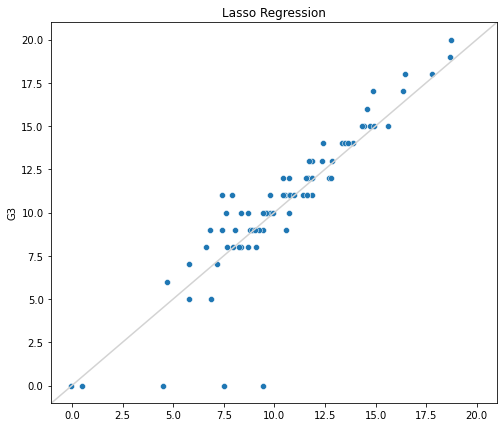

In [53]:
from sklearn.linear_model import Lasso

# Training model
model_lasso = Lasso(alpha = 0.5).fit(train2[features], train2[target])

# Metrics
print("Train Data")
print(regression_metrics(model_lasso, train2, features))
print(20 * "-")

print("Test Data")
print(regression_metrics(model_lasso, test2, features))
print(20 * "-")

# Plotting predictions vs true
plt.figure(figsize = (8,7))
plt.axline((0,0), (20, 20), color = "lightgray")
sns.scatterplot(model_lasso.predict(test2[features]), test2[target])
plt.title("Lasso Regression")
plt.show()

Lasso Regression had the best performance so far. Let's check the weights and see which features are used.

In [54]:
lasso_imp = pd.DataFrame(model_lasso.coef_, columns = ["Weights"], index = features)
lasso_imp.sort_values("Weights", ascending = False)

,Weights
G2,3.48
G1,0.31
absences_log,0.17
age,-0.00
romantic_1,-0.00
...,...
guardian_2,-0.00
traveltime_2,-0.00
traveltime_3,-0.00
traveltime_4,0.00


From the Lasso Regression, G2 is the most important feature to predict the final grades, followed by G1 and absences_log. all the others features have no importance.

## Neural Networks

Train Data
           Values
R2 Score     1.00
MSE          0.00
Exp. Var.    1.00
--------------------
Test Data
           Values
R2 Score     0.63
MSE          6.14
Exp. Var.    0.64
--------------------


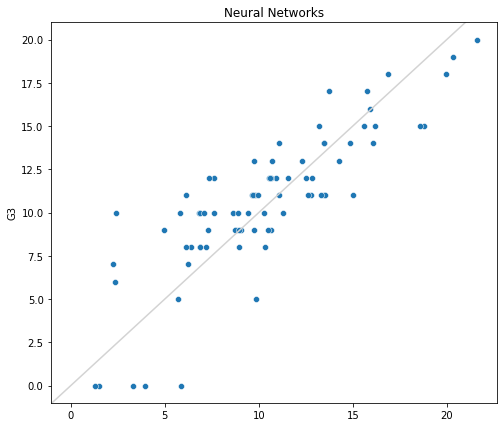

In [55]:
from sklearn.neural_network import MLPRegressor

# Training model
model_nn = MLPRegressor(
    hidden_layer_sizes = (100, 100),
    solver = "lbfgs",
    activation = "relu",
    # alpha = 50,
    max_iter = 500
).fit(train2[features], train2[target])

# Metrics
print("Train Data")
print(regression_metrics(model_nn, train2, features))
print(20 * "-")

print("Test Data")
print(regression_metrics(model_nn, test2, features))
print(20 * "-")

# Plotting predictions vs true
plt.figure(figsize = (8,7))
plt.axline((0,0), (20, 20), color = "lightgray")
sns.scatterplot(model_nn.predict(test2[features]), test2[target])
plt.title("Neural Networks")
plt.show()

Neural networks is performing worst than the others models...

From the Lasso Regression, only 3 features showed to have importance to predict the final grade: G2, G1, and absences_log. Let's try the XGBoost using only these 3 features

[17:10:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train Data
           Values
R2 Score     0.91
MSE          1.90
Exp. Var.    0.91
--------------------
Test Data
           Values
R2 Score     0.77
MSE          3.80
Exp. Var.    0.78
--------------------


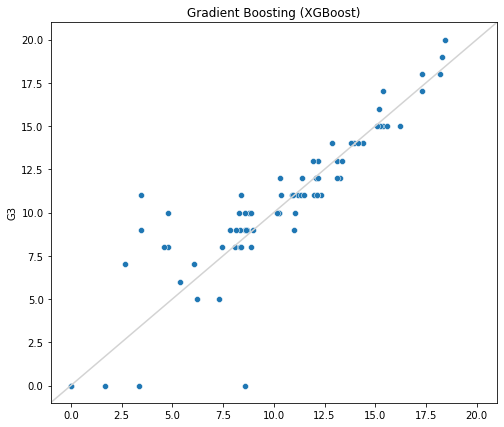

In [56]:
imp_features = ["G1", "G2", "absences_log"]

# Training model
model_xgb = XGBRegressor(
    n_estimators = 100, 
    max_depth = 2,
    # reg_alpha = 10,
    # reg_lambda = 1,
    tree_method = "exact",
    random_state = 1
).fit(train_xgb[imp_features], train_xgb[target])

# Metrics
print("Train Data")
print(regression_metrics(model_xgb, train_xgb, imp_features))
print(20 * "-")

print("Test Data")
print(regression_metrics(model_xgb, test_xgb, imp_features))
print(20 * "-")

# Plotting predictions vs true
plt.figure(figsize = (8,7))
plt.axline((0,0), (20, 20), color = "lightgray")
sns.scatterplot(model_xgb.predict(test_xgb[imp_features]), test_xgb[target])
plt.title("Gradient Boosting (XGBoost)")
plt.show()

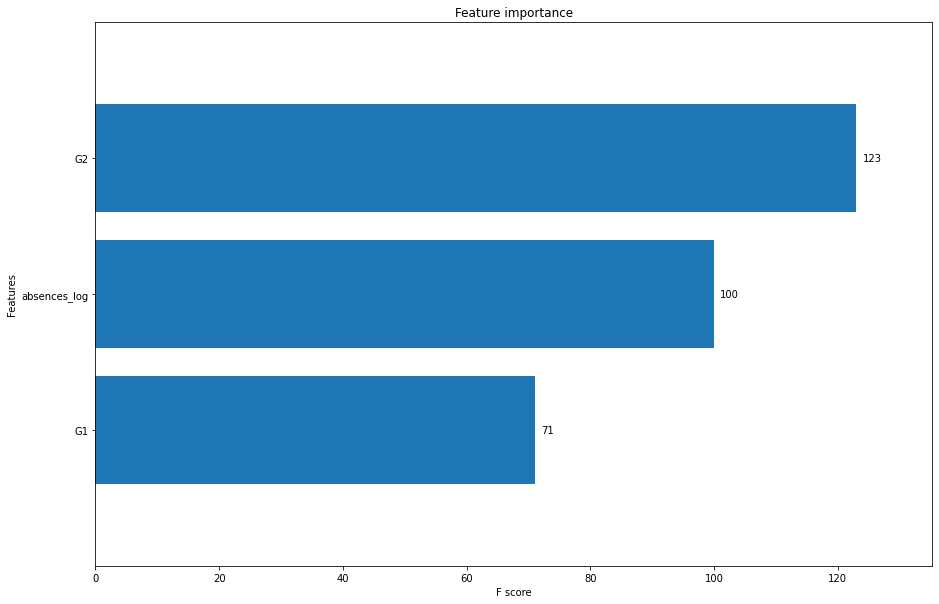

In [57]:
fig, ax = plt.subplots(1,1,figsize = (15,10))
plot_importance(model_xgb, height = 0.8, ax = ax, grid = False);

Using only the e features suggested from the Lasso Regression

# Summary

## EDA

* There was no missing values in the data.
* Most of the features are categorical. Only 3 features are numerical.
* We took the log transformation of the `absences`.
* From the correlation plot, `G1` and `G2` are the features with the higher correlation with the final grade `G3`.

## Regression

* All the tree based methods performed reasonably well, but are all overfitting in the training set.
* Lasso regression showed that regularization is strongly important to improve results and to avoid overfitting.
* `G2`, `G1`, and `absences_log` are the most important features to predict `G3`.